<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EVA4/blob/master/Session-15/Assignment-15/Assignment-15-Final/EVA_4_S15_A_Final_Mask_Depth_V9_Both.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVA-4 : Assignment 15 - Final

New
- Normalization
- Double depth loss

Previous

- Reduced no of channels
- Reduced layers

### Summary
- Create dataset 
  - Only background (bg)
  - Background + Foreground (bg_fg)
  - Foreground Mask (fg_mask)
- Load Dataset
- Display sample images 
- Create Network
- Train Model
- Display Images


In [1]:
import torch
from IPython.display import Image, clear_output 

print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


### Mount google drive

In [2]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Install libraries

##### Dataset
- albumentation: Data Augmentation

##### Helper
- autotime : Prints cell execution time
- torchsummary : Prints model summary

In [3]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-qcng7f_w
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-qcng7f_w
     |████████████████████████████████| 634kB 3.5MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65038 sha256=8c58170db4eaacc24ef0fdb6af7b9376992a8197c39efce5d9ba573349298956
  Stored in directory: /tmp/pip-ephem-wheel-cache-lq19yj8h/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=0c46199e43311cfb24015c3f89371a69b7315b8d874a23d6b7f1bb16f264ab95
  Stored in directory: /tmp/pip-ephem-wheel-cache-lq19yj8h/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: album

In [4]:
# Library to print cell execution time
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=a1967aede93d5abeebf7f6e9381e72523583a0bc56a0785f8418c6cb065e3959
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


### Import all modules and libraries

In [5]:
# System
import os
import sys

# Scikit
import numpy as np

# Plotting
import matplotlib.pyplot as plt

# Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid
from torchsummary import summary

# Image Proessing
from PIL import Image

time: 365 ms


### Set the directory path of google drive

In [6]:
BASE_COLAB_PATH = '/content/drive/My Drive/eva-4/assignment-15/assignemnt-15-final' 

sys.path.append(BASE_COLAB_PATH)
sys.path.append(BASE_COLAB_PATH + '/models')
sys.path.append(BASE_COLAB_PATH + '/saved_models')

time: 1.5 ms


In [7]:
cd '/content/drive/My Drive/eva-4/assignment-15/assignment-15-final'

/content/drive/My Drive/eva-4/assignment-15/assignment-15-final
time: 324 ms


### Set Device

In [8]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda
time: 2.59 ms


### Import all the functions

In [9]:
#import custommodel
from models import custommodel
from functions import transformations, loaddataset, show, train, train_test_model, loadcheckpoint, plotmetrics
from dataset import ImageDataset

time: 3.13 s


### Hyperparameters



In [10]:
# Define hyper paramteres and constants
START_EPOCH=1
EPOCHS=20
BATCH_SIZE=16
LEARNING_RATE=0.01

IMAGE_WIDTH=224
IMAGE_HEIGHT=224
INPUT_CHANNELS=3

BATCH_1_ZIP = 'batch_1.zip'
BATCH_2_ZIP = 'batch_2.zip'
BATCH_3_ZIP = 'batch_3.zip'
BATCH_4_ZIP = 'batch_4.zip'
BATCH_5_ZIP = 'batch_5.zip'
BATCH_6_ZIP = 'batch_6.zip'
BATCH_7_ZIP = 'batch_7.zip'
BATCH_8_ZIP = 'batch_8.zip'
BATCH_9_ZIP = 'batch_9.zip'
BATCH_10_ZIP = 'batch_10.zip'
BATCH_11_ZIP = 'batch_11.zip'
BATCH_12_ZIP = 'batch_12.zip'
BATCH_13_ZIP = 'batch_13.zip'
BATCH_14_ZIP = 'batch_14.zip'
BATCH_15_ZIP = 'batch_15.zip'

DATASET_ROOT='/content/drive/My Drive/eva-4/assignment-15/asssignment-15-A/s_ds/extracted_partial/64x64'
ZIP_FILES_PATH='/content/drive/My Drive/eva-4/assignment-15/assignment-15-final/ds/zipfiles/'
MODEL_SAVE_PATH='/content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models'
BEST_MODEL_PATH='/content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth'
METRICS_PATH='/content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/metrics.png'

time: 24.7 ms


### Load Transformations

In [11]:
transformtrain, transform_test = transformations()

time: 1.45 ms


### Load Dataset

In [12]:
batch_1_zipfilepath = ZIP_FILES_PATH + BATCH_1_ZIP
trainloader, testloader = loaddataset(batch_1_zipfilepath, transformtrain, batch_size=BATCH_SIZE)

30001
time: 329 ms


### Display sample images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([16, 3, 224, 224])
torch.Size([16, 1, 224, 224])
torch.Size([16, 3, 224, 224])


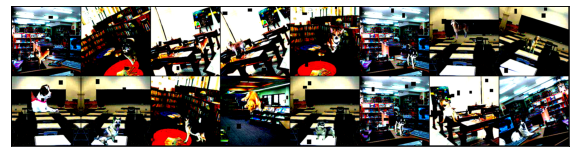

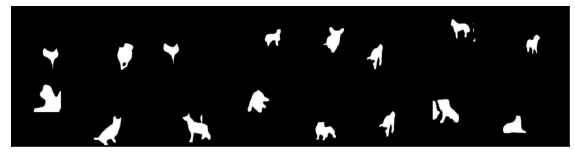

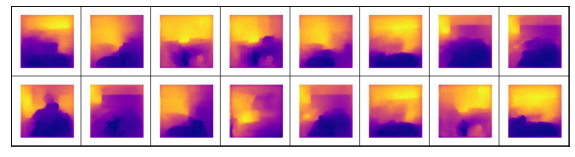

time: 813 ms


In [13]:
sampleTrain = next(iter(trainloader))
trainimages = sampleTrain['bg_fg']
trainmasks = sampleTrain['mask']
traindepths = sampleTrain['depth']
print(trainimages.shape)
print(trainmasks.shape)
print(traindepths.shape)
show(trainimages)
show(trainmasks)
show(traindepths)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([16, 3, 224, 224])
torch.Size([16, 1, 224, 224])
torch.Size([16, 3, 224, 224])


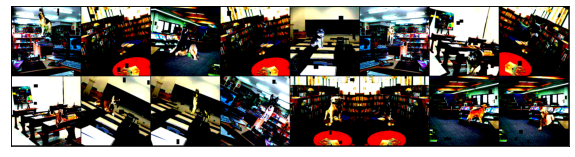

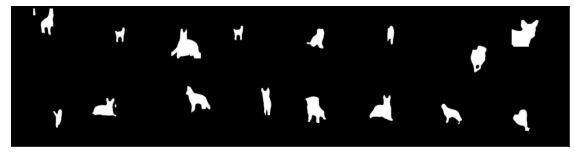

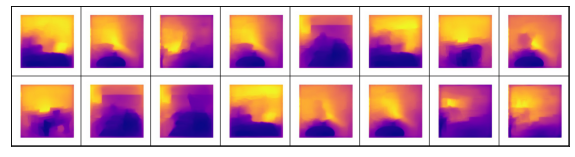

time: 786 ms


In [14]:
sampleTest = next(iter(testloader))
testimages = sampleTest['bg_fg']
testmasks = sampleTest['mask']
testdepths = sampleTest['depth']
print(testimages.shape)
print(testmasks.shape)
print(testdepths.shape)
show(testimages)
show(testmasks)
show(testdepths)

### Load Model

In [12]:
print("Building Model")
net = custommodel.CustomNet(in_shape=(INPUT_CHANNELS, IMAGE_WIDTH, IMAGE_HEIGHT))

Building Model
time: 92 ms


In [13]:
model = net.to(device)
summary(model, input_size=(INPUT_CHANNELS, IMAGE_WIDTH, IMAGE_HEIGHT))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             864
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
      ConvBnRelu2d-4         [-1, 32, 224, 224]               0
            Conv2d-5         [-1, 32, 224, 224]           9,216
       BatchNorm2d-6         [-1, 32, 224, 224]              64
              ReLU-7         [-1, 32, 224, 224]               0
      ConvBnRelu2d-8         [-1, 32, 224, 224]               0
           Encoder-9  [[-1, 32, 224, 224], [-1, 32, 112, 112]]               0
           Conv2d-10         [-1, 64, 112, 112]          18,432
      BatchNorm2d-11         [-1, 64, 112, 112]             128
             ReLU-12         [-1, 64, 112, 112]               0
     ConvBnRelu2d-13         [-1, 64, 112, 112]               0
           Conv2d-14    

### Define loss function and optimizer


In [14]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(),lr= LEARNING_RATE, momentum=0.9, weight_decay=1e-5, nesterov=True)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2)

time: 2.09 ms


### Train/Test Model

##### Training-1

>>>>>>>> 
Epoch 1/40, LR: 0.01


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


train: bce: 1.426658, dice: 1.326649, loss: 1.426658


Train - Actual mask


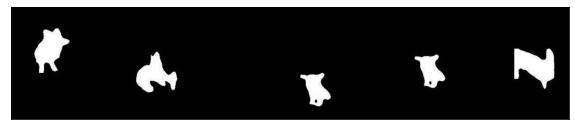

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


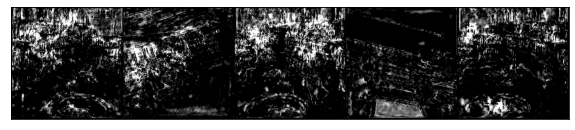



Train - Actual Depth


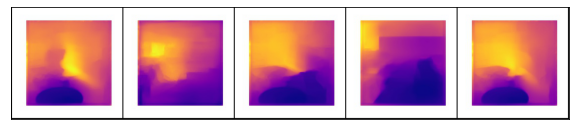

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


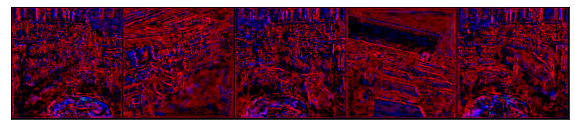

Best val loss: 1.426658
train: bce: 0.773664, dice: 1.174729, loss: 0.773664
train: bce: 0.644915, dice: 1.116076, loss: 0.644915
train: bce: 0.592250, dice: 1.085816, loss: 0.592250
train: bce: 0.563578, dice: 1.062485, loss: 0.563578
train: bce: 0.544390, dice: 1.041371, loss: 0.544390
train: bce: 0.530035, dice: 1.023417, loss: 0.530035
train: bce: 0.519457, dice: 1.007262, loss: 0.519457
train: bce: 0.510803, dice: 0.994334, loss: 0.510803
test: bce: 0.428443, dice: 0.767340, loss: 0.428443


Test - Actual mask: 1


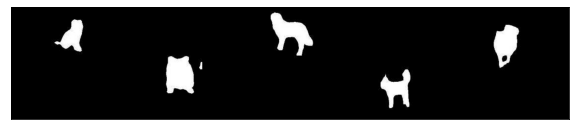

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


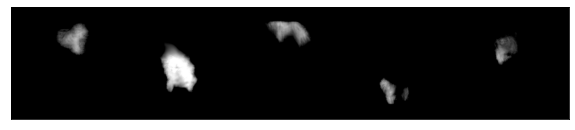



Test - Actual Depth


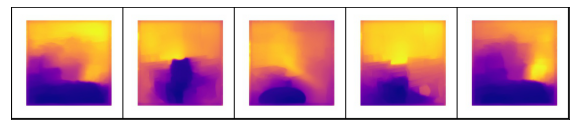

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


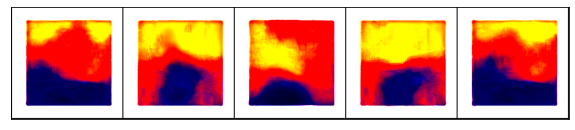

test: bce: 0.458125, dice: 0.862507, loss: 0.458125
test: bce: 0.458707, dice: 0.864097, loss: 0.458707
test: bce: 0.458647, dice: 0.863854, loss: 0.458647
************* 
Epoch: 1 	Training Loss: 0.505097 	Validation Loss: 0.458240

Validation loss decreased (100000.000000 --> 0.458240).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
>>>>>>>> 
Epoch 2/40, LR: 0.01
train: bce: 0.447619, dice: 0.833286, loss: 0.447619
train: bce: 0.440534, dice: 0.854384, loss: 0.440534
train: bce: 0.439287, dice: 0.847852, loss: 0.439287
train: bce: 0.437289, dice: 0.845502, loss: 0.437289
train: bce: 0.435797, dice: 0.839671, loss: 0.435797
train: bce: 0.434670, dice: 0.830116, loss: 0.434670
train: bce: 0.433310, dice: 0.820131, loss: 0.433310
train: bce: 0.431815, dice: 0.813974, loss: 0.431815
train: bce: 0.429819, dice: 0.806256, loss: 0.429819
test: bce: 0.413290, dice: 0.811183, loss: 0.413290
test: bce: 0.417419, di

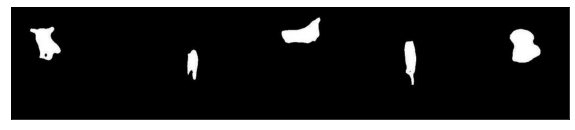

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


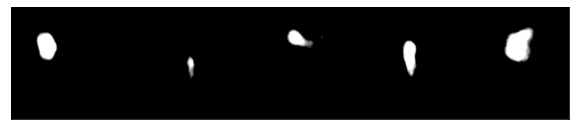



Train - Actual Depth


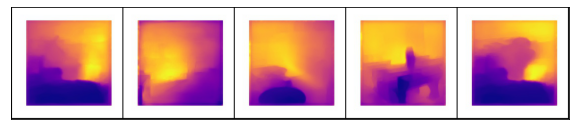

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


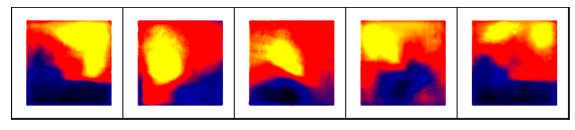

Best val loss: 0.376074
train: bce: 0.397908, dice: 0.672054, loss: 0.397908
train: bce: 0.396737, dice: 0.670290, loss: 0.396737
train: bce: 0.396315, dice: 0.668465, loss: 0.396315
train: bce: 0.394330, dice: 0.661497, loss: 0.394330
train: bce: 0.393991, dice: 0.659265, loss: 0.393991
train: bce: 0.392844, dice: 0.654774, loss: 0.392844
train: bce: 0.392539, dice: 0.652933, loss: 0.392539
train: bce: 0.392223, dice: 0.651565, loss: 0.392223
test: bce: 0.375109, dice: 0.596682, loss: 0.375109


Test - Actual mask: 4


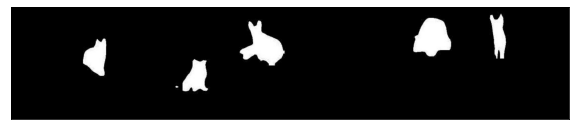

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


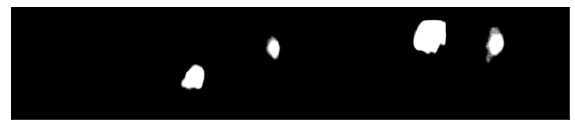



Test - Actual Depth


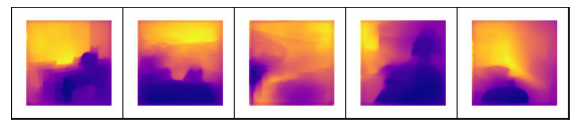

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


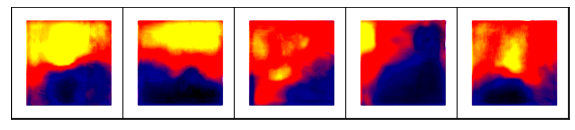

test: bce: 0.392967, dice: 0.649380, loss: 0.392967
test: bce: 0.392457, dice: 0.645444, loss: 0.392457
test: bce: 0.392230, dice: 0.642689, loss: 0.392230
************* 
Epoch: 4 	Training Loss: 0.376074 	Validation Loss: 0.391825

Validation loss decreased (0.402283 --> 0.391825).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
>>>>>>>> 
Epoch 5/40, LR: 0.01
train: bce: 0.386308, dice: 0.643933, loss: 0.386308
train: bce: 0.387169, dice: 0.628062, loss: 0.387169
train: bce: 0.385435, dice: 0.624072, loss: 0.385435
train: bce: 0.385421, dice: 0.623901, loss: 0.385421
train: bce: 0.384034, dice: 0.618795, loss: 0.384034
train: bce: 0.383517, dice: 0.616422, loss: 0.383517
train: bce: 0.383928, dice: 0.615668, loss: 0.383928
train: bce: 0.383819, dice: 0.613715, loss: 0.383819
train: bce: 0.383083, dice: 0.611808, loss: 0.383083
test: bce: 0.369591, dice: 0.531333, loss: 0.369591
test: bce: 0.379852, dice: 0

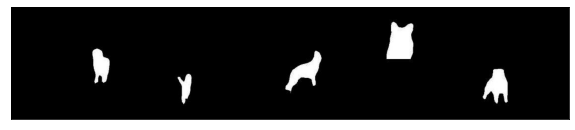

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


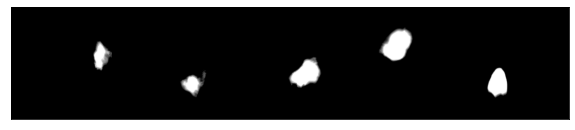



Train - Actual Depth


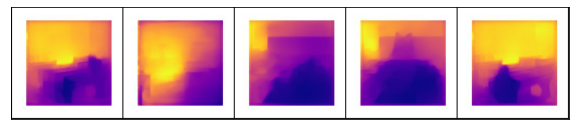

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


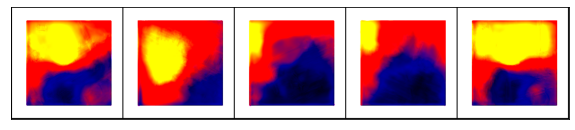

Best val loss: 0.357202
train: bce: 0.367850, dice: 0.532963, loss: 0.367850
train: bce: 0.368089, dice: 0.539066, loss: 0.368089
train: bce: 0.367771, dice: 0.543296, loss: 0.367771
train: bce: 0.367340, dice: 0.542741, loss: 0.367340
train: bce: 0.367927, dice: 0.541527, loss: 0.367927
train: bce: 0.368016, dice: 0.542223, loss: 0.368016
train: bce: 0.367885, dice: 0.541823, loss: 0.367885
train: bce: 0.368108, dice: 0.542694, loss: 0.368108
test: bce: 0.350491, dice: 0.499064, loss: 0.350491


Test - Actual mask: 8


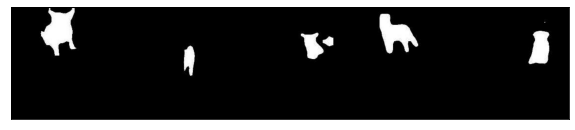

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


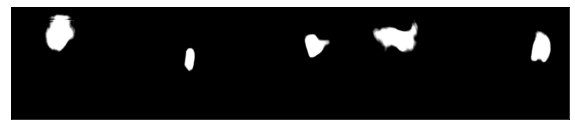



Test - Actual Depth


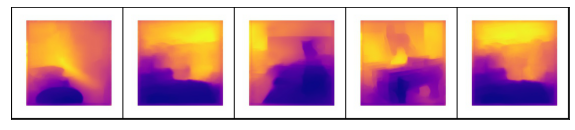

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


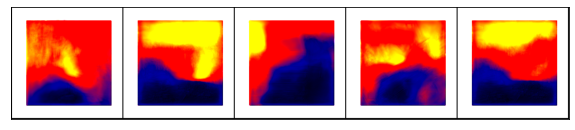

test: bce: 0.366660, dice: 0.530436, loss: 0.366660
test: bce: 0.368514, dice: 0.538107, loss: 0.368514
test: bce: 0.368742, dice: 0.538218, loss: 0.368742
************* 
Epoch: 8 	Training Loss: 0.357202 	Validation Loss: 0.369973

Validation loss decreased (0.371222 --> 0.369973).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
>>>>>>>> 
Epoch 9/40, LR: 0.01
train: bce: 0.365988, dice: 0.535685, loss: 0.365988
train: bce: 0.361522, dice: 0.517600, loss: 0.361522
train: bce: 0.363292, dice: 0.523329, loss: 0.363292
train: bce: 0.363516, dice: 0.527847, loss: 0.363516
train: bce: 0.364101, dice: 0.527979, loss: 0.364101
train: bce: 0.364552, dice: 0.528785, loss: 0.364552
train: bce: 0.364536, dice: 0.527780, loss: 0.364536
train: bce: 0.364478, dice: 0.525933, loss: 0.364478
train: bce: 0.364803, dice: 0.526444, loss: 0.364803
test: bce: 0.339340, dice: 0.479494, loss: 0.339340
test: bce: 0.361918, dice: 0

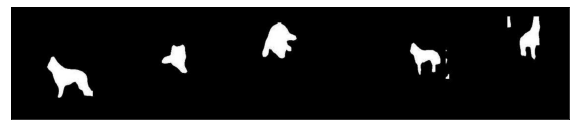

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


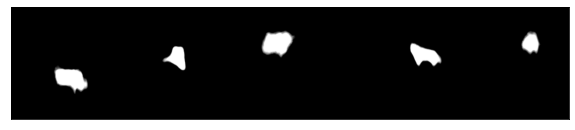



Train - Actual Depth


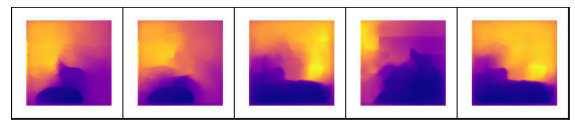

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


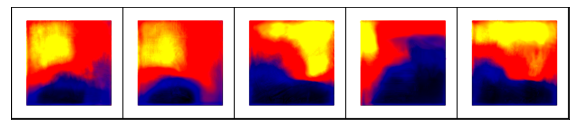

Best val loss: 0.350755
train: bce: 0.358821, dice: 0.486192, loss: 0.358821
train: bce: 0.357004, dice: 0.489604, loss: 0.357004
train: bce: 0.357604, dice: 0.491848, loss: 0.357604
train: bce: 0.357817, dice: 0.491970, loss: 0.357817
train: bce: 0.357881, dice: 0.491578, loss: 0.357881
train: bce: 0.357751, dice: 0.491380, loss: 0.357751
train: bce: 0.357887, dice: 0.491416, loss: 0.357887
train: bce: 0.357734, dice: 0.491240, loss: 0.357734
test: bce: 0.355935, dice: 0.497370, loss: 0.355935


Test - Actual mask: 12


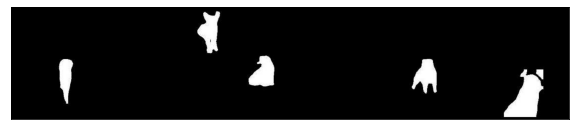

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


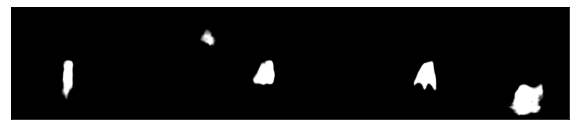



Test - Actual Depth


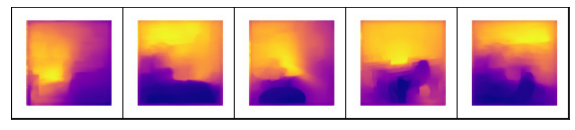

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


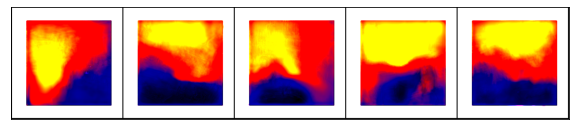

test: bce: 0.360777, dice: 0.512300, loss: 0.360777
test: bce: 0.361746, dice: 0.510360, loss: 0.361746
test: bce: 0.360828, dice: 0.507296, loss: 0.360828
************* 
Epoch: 12 	Training Loss: 0.345477 	Validation Loss: 0.361297

>>>>>>>> 
Epoch 13/40, LR: 0.01
train: bce: 0.346682, dice: 0.442948, loss: 0.346682
train: bce: 0.355256, dice: 0.474819, loss: 0.355256
train: bce: 0.355242, dice: 0.479870, loss: 0.355242
train: bce: 0.356027, dice: 0.485066, loss: 0.356027
train: bce: 0.356747, dice: 0.486800, loss: 0.356747
train: bce: 0.355977, dice: 0.485638, loss: 0.355977
train: bce: 0.356086, dice: 0.485498, loss: 0.356086
train: bce: 0.355677, dice: 0.484856, loss: 0.355677
train: bce: 0.355423, dice: 0.484120, loss: 0.355423
test: bce: 0.352712, dice: 0.460988, loss: 0.352712
test: bce: 0.353449, dice: 0.477399, loss: 0.353449
test: bce: 0.355972, dice: 0.485644, loss: 0.355972
test: bce: 0.356011, dice: 0.485579, loss: 0.356011
************* 
Epoch: 13 	Training Loss: 0.341682

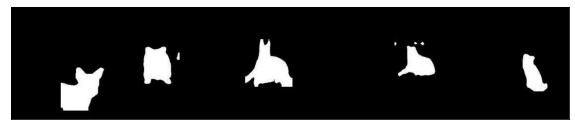

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


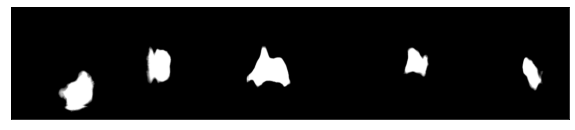



Train - Actual Depth


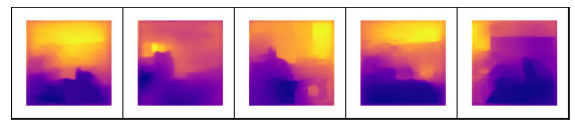

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


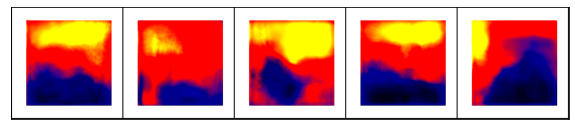

Best val loss: 0.338717
train: bce: 0.355435, dice: 0.467151, loss: 0.355435
train: bce: 0.353559, dice: 0.462406, loss: 0.353559
train: bce: 0.352678, dice: 0.461985, loss: 0.352678
train: bce: 0.351706, dice: 0.461546, loss: 0.351706
train: bce: 0.351483, dice: 0.461633, loss: 0.351483
train: bce: 0.351620, dice: 0.462121, loss: 0.351620
train: bce: 0.351557, dice: 0.462842, loss: 0.351557
train: bce: 0.351633, dice: 0.463252, loss: 0.351633
test: bce: 0.346081, dice: 0.485385, loss: 0.346081


Test - Actual mask: 16


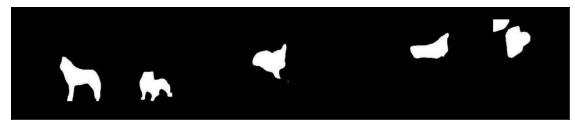

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


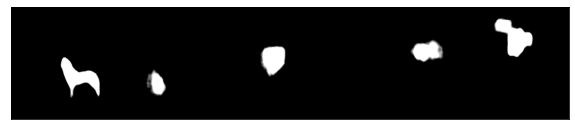



Test - Actual Depth


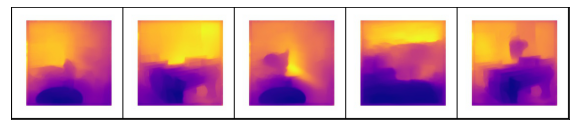

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


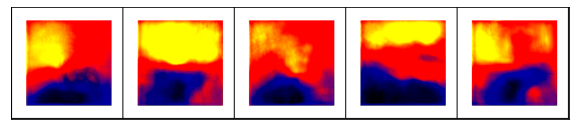

test: bce: 0.354912, dice: 0.467312, loss: 0.354912
test: bce: 0.354299, dice: 0.469621, loss: 0.354299
test: bce: 0.353703, dice: 0.469053, loss: 0.353703
************* 
Epoch: 16 	Training Loss: 0.338717 	Validation Loss: 0.353719

Validation loss decreased (0.353831 --> 0.353719).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
>>>>>>>> 
Epoch 17/40, LR: 0.01
train: bce: 0.346029, dice: 0.442918, loss: 0.346029
train: bce: 0.349859, dice: 0.457273, loss: 0.349859
train: bce: 0.350305, dice: 0.455660, loss: 0.350305
train: bce: 0.350484, dice: 0.458533, loss: 0.350484
train: bce: 0.350409, dice: 0.459936, loss: 0.350409
train: bce: 0.350975, dice: 0.459082, loss: 0.350975
train: bce: 0.350961, dice: 0.459261, loss: 0.350961
train: bce: 0.351111, dice: 0.459723, loss: 0.351111
train: bce: 0.351121, dice: 0.459706, loss: 0.351121
test: bce: 0.333121, dice: 0.437368, loss: 0.333121
test: bce: 0.352261, dice:

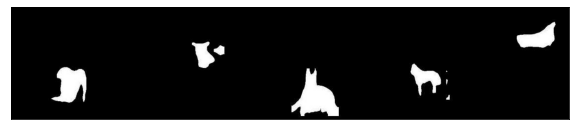

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


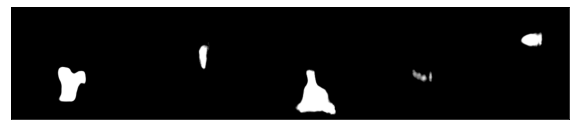



Train - Actual Depth


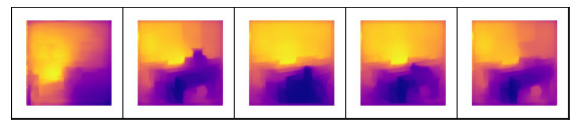

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


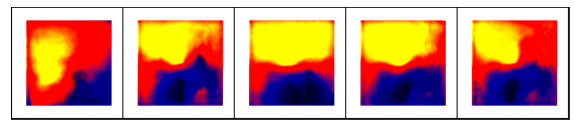

Best val loss: 0.354338
train: bce: 0.347442, dice: 0.448159, loss: 0.347442
train: bce: 0.347523, dice: 0.447047, loss: 0.347523
train: bce: 0.347195, dice: 0.445043, loss: 0.347195
train: bce: 0.347049, dice: 0.441785, loss: 0.347049
train: bce: 0.347099, dice: 0.441857, loss: 0.347099
train: bce: 0.347635, dice: 0.442354, loss: 0.347635
train: bce: 0.347815, dice: 0.442425, loss: 0.347815
train: bce: 0.347705, dice: 0.442533, loss: 0.347705
test: bce: 0.381271, dice: 0.460033, loss: 0.381271


Test - Actual mask: 20


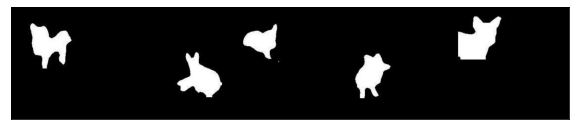

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


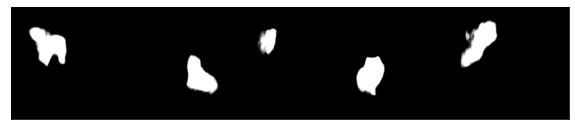



Test - Actual Depth


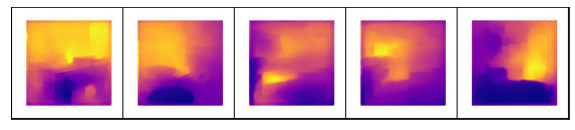

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


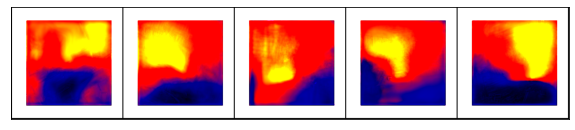

test: bce: 0.348379, dice: 0.440798, loss: 0.348379
test: bce: 0.348068, dice: 0.439973, loss: 0.348068
test: bce: 0.348749, dice: 0.443628, loss: 0.348749
************* 
Epoch: 20 	Training Loss: 0.344620 	Validation Loss: 0.348415

Validation loss decreased (0.348704 --> 0.348415).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
>>>>>>>> 
Epoch 21/40, LR: 0.01
train: bce: 0.358873, dice: 0.453462, loss: 0.358873
train: bce: 0.347739, dice: 0.431386, loss: 0.347739
train: bce: 0.347728, dice: 0.438090, loss: 0.347728
train: bce: 0.347181, dice: 0.438223, loss: 0.347181
train: bce: 0.347091, dice: 0.439038, loss: 0.347091
train: bce: 0.346991, dice: 0.439331, loss: 0.346991
train: bce: 0.346691, dice: 0.438675, loss: 0.346691
train: bce: 0.346806, dice: 0.439409, loss: 0.346806
train: bce: 0.346707, dice: 0.438784, loss: 0.346707
test: bce: 0.354304, dice: 0.482136, loss: 0.354304
test: bce: 0.348780, dice:

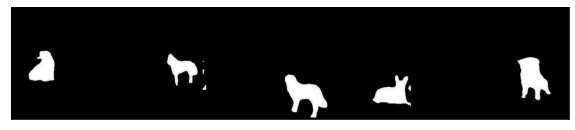

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


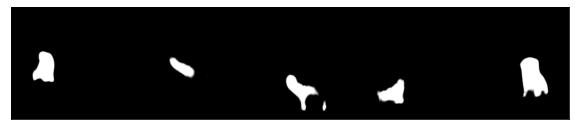



Train - Actual Depth


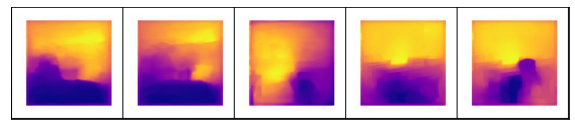

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


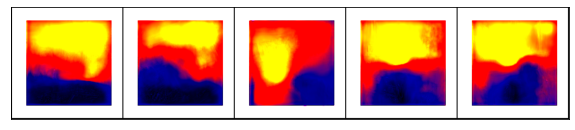

Best val loss: 0.329510
train: bce: 0.345306, dice: 0.426264, loss: 0.345306
train: bce: 0.345439, dice: 0.430019, loss: 0.345439
train: bce: 0.344692, dice: 0.429391, loss: 0.344692
train: bce: 0.344648, dice: 0.428405, loss: 0.344648
train: bce: 0.344651, dice: 0.429012, loss: 0.344651
train: bce: 0.344641, dice: 0.428862, loss: 0.344641
train: bce: 0.344477, dice: 0.428582, loss: 0.344477
train: bce: 0.344671, dice: 0.429134, loss: 0.344671
test: bce: 0.339859, dice: 0.437609, loss: 0.339859


Test - Actual mask: 24


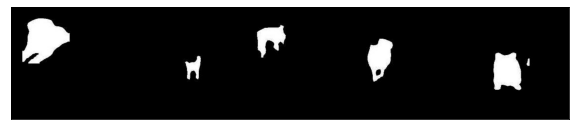

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


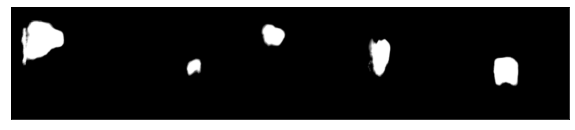



Test - Actual Depth


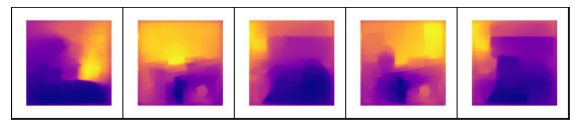

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


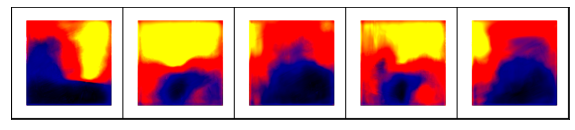

test: bce: 0.347194, dice: 0.432315, loss: 0.347194
test: bce: 0.345900, dice: 0.428268, loss: 0.345900
test: bce: 0.346382, dice: 0.429127, loss: 0.346382
************* 
Epoch: 24 	Training Loss: 0.329510 	Validation Loss: 0.346326

>>>>>>>> 
Epoch 25/40, LR: 0.01
train: bce: 0.337117, dice: 0.406655, loss: 0.337117
train: bce: 0.342484, dice: 0.419353, loss: 0.342484
train: bce: 0.343031, dice: 0.423038, loss: 0.343031
train: bce: 0.343924, dice: 0.426078, loss: 0.343924
train: bce: 0.343377, dice: 0.422279, loss: 0.343377
train: bce: 0.343454, dice: 0.423498, loss: 0.343454
train: bce: 0.343231, dice: 0.423299, loss: 0.343231
train: bce: 0.343047, dice: 0.423092, loss: 0.343047
train: bce: 0.343336, dice: 0.423168, loss: 0.343336
test: bce: 0.344890, dice: 0.419837, loss: 0.344890
test: bce: 0.343959, dice: 0.426411, loss: 0.343959
test: bce: 0.346017, dice: 0.424498, loss: 0.346017
test: bce: 0.345512, dice: 0.424482, loss: 0.345512
************* 
Epoch: 25 	Training Loss: 0.337117

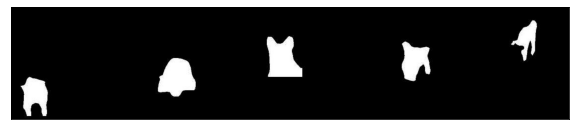

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


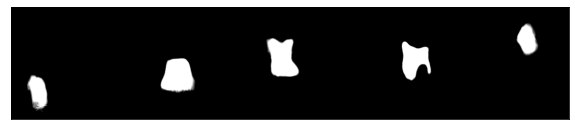



Train - Actual Depth


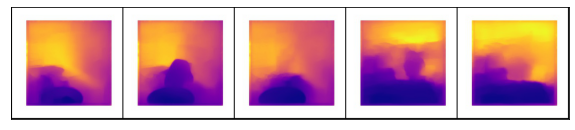



Train - Predicted Depth


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


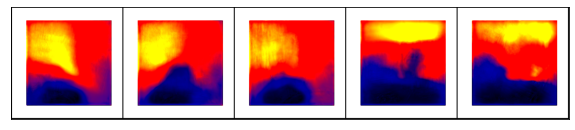

Best val loss: 0.333925
train: bce: 0.340225, dice: 0.414372, loss: 0.340225
train: bce: 0.340265, dice: 0.411478, loss: 0.340265
train: bce: 0.341305, dice: 0.414427, loss: 0.341305
train: bce: 0.341530, dice: 0.413622, loss: 0.341530
train: bce: 0.341982, dice: 0.415077, loss: 0.341982
train: bce: 0.341978, dice: 0.414671, loss: 0.341978
train: bce: 0.341863, dice: 0.415974, loss: 0.341863
train: bce: 0.341702, dice: 0.416188, loss: 0.341702
test: bce: 0.344496, dice: 0.422779, loss: 0.344496


Test - Actual mask: 28


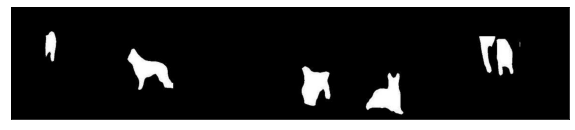

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


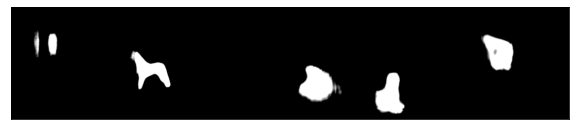



Test - Actual Depth


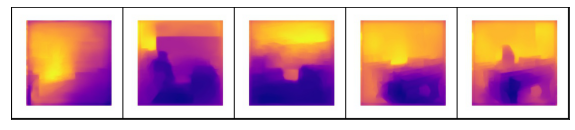

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


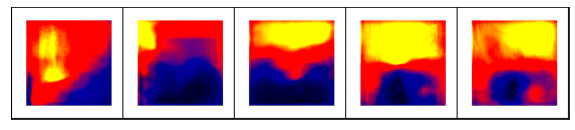

test: bce: 0.345236, dice: 0.429044, loss: 0.345236
test: bce: 0.343490, dice: 0.418576, loss: 0.343490
test: bce: 0.344038, dice: 0.420086, loss: 0.344038
************* 
Epoch: 28 	Training Loss: 0.333925 	Validation Loss: 0.343813

>>>>>>>> 
Epoch 29/40, LR: 0.01
train: bce: 0.346512, dice: 0.433056, loss: 0.346512
train: bce: 0.341780, dice: 0.416053, loss: 0.341780
train: bce: 0.341676, dice: 0.413764, loss: 0.341676
train: bce: 0.341357, dice: 0.412012, loss: 0.341357
train: bce: 0.341761, dice: 0.414300, loss: 0.341761
train: bce: 0.341359, dice: 0.412380, loss: 0.341359
train: bce: 0.341265, dice: 0.412213, loss: 0.341265
train: bce: 0.341152, dice: 0.412026, loss: 0.341152
train: bce: 0.341148, dice: 0.412586, loss: 0.341148
test: bce: 0.328198, dice: 0.389433, loss: 0.328198
test: bce: 0.343545, dice: 0.414978, loss: 0.343545
test: bce: 0.343485, dice: 0.413414, loss: 0.343485
test: bce: 0.343446, dice: 0.413789, loss: 0.343446
************* 
Epoch: 29 	Training Loss: 0.339649

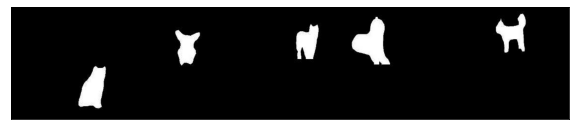

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


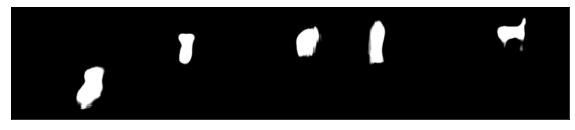



Train - Actual Depth


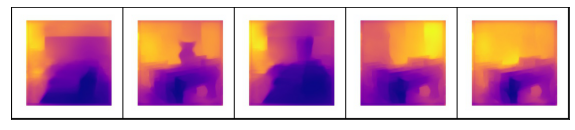

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


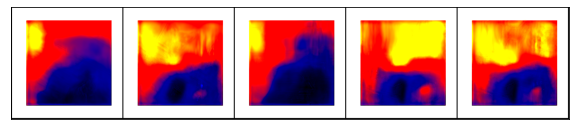

Best val loss: 0.332571
train: bce: 0.339886, dice: 0.400537, loss: 0.339886
train: bce: 0.340588, dice: 0.405976, loss: 0.340588
train: bce: 0.340208, dice: 0.405856, loss: 0.340208
train: bce: 0.340430, dice: 0.408765, loss: 0.340430
train: bce: 0.340335, dice: 0.409874, loss: 0.340335
train: bce: 0.340110, dice: 0.408339, loss: 0.340110
train: bce: 0.339857, dice: 0.407016, loss: 0.339857
train: bce: 0.339847, dice: 0.407160, loss: 0.339847
test: bce: 0.334776, dice: 0.390049, loss: 0.334776


Test - Actual mask: 32


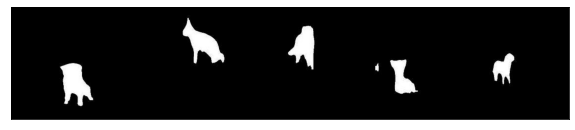

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


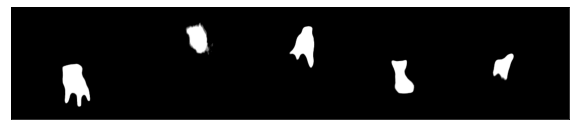



Test - Actual Depth


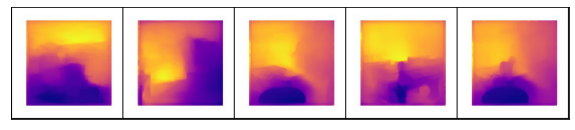

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


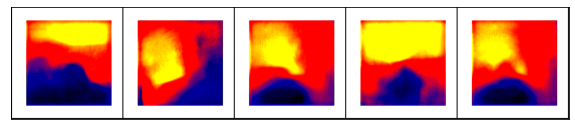

test: bce: 0.340762, dice: 0.403536, loss: 0.340762
test: bce: 0.341432, dice: 0.405103, loss: 0.341432
test: bce: 0.341458, dice: 0.407170, loss: 0.341458
************* 
Epoch: 32 	Training Loss: 0.329677 	Validation Loss: 0.341447

Validation loss decreased (0.341816 --> 0.341447).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
>>>>>>>> 
Epoch 33/40, LR: 0.01
train: bce: 0.331134, dice: 0.339461, loss: 0.331134
train: bce: 0.340230, dice: 0.408775, loss: 0.340230
train: bce: 0.339560, dice: 0.403814, loss: 0.339560
train: bce: 0.339130, dice: 0.400418, loss: 0.339130
train: bce: 0.339034, dice: 0.402066, loss: 0.339034
train: bce: 0.338762, dice: 0.401591, loss: 0.338762
train: bce: 0.338849, dice: 0.401730, loss: 0.338849
train: bce: 0.339141, dice: 0.402247, loss: 0.339141
train: bce: 0.339117, dice: 0.402562, loss: 0.339117
test: bce: 0.325723, dice: 0.349332, loss: 0.325723
test: bce: 0.339246, dice:

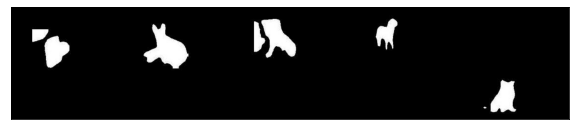

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


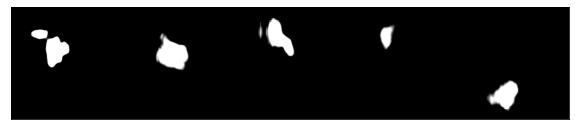



Train - Actual Depth


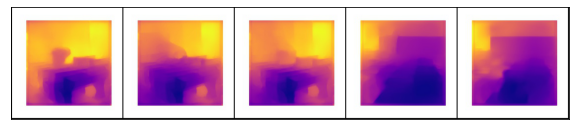

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


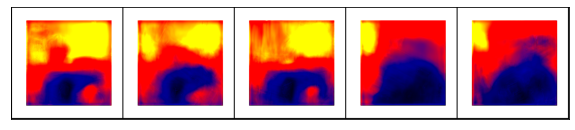

Best val loss: 0.338262
train: bce: 0.337055, dice: 0.401405, loss: 0.337055
train: bce: 0.339079, dice: 0.404153, loss: 0.339079
train: bce: 0.338394, dice: 0.401504, loss: 0.338394
train: bce: 0.338338, dice: 0.401060, loss: 0.338338
train: bce: 0.338532, dice: 0.399593, loss: 0.338532
train: bce: 0.338423, dice: 0.399642, loss: 0.338423
train: bce: 0.338355, dice: 0.398706, loss: 0.338355
train: bce: 0.338062, dice: 0.397913, loss: 0.338062
test: bce: 0.340967, dice: 0.377347, loss: 0.340967


Test - Actual mask: 36


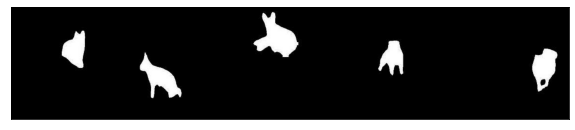

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


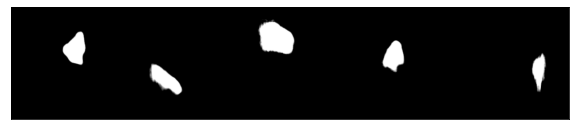



Test - Actual Depth


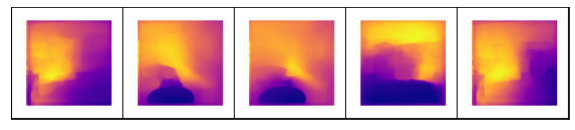

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


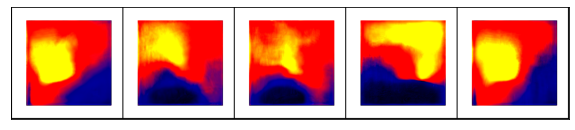

test: bce: 0.338910, dice: 0.401233, loss: 0.338910
test: bce: 0.339456, dice: 0.403788, loss: 0.339456
test: bce: 0.339449, dice: 0.402239, loss: 0.339449
************* 
Epoch: 36 	Training Loss: 0.331083 	Validation Loss: 0.339565

Validation loss decreased (0.340218 --> 0.339565).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
>>>>>>>> 
Epoch 37/40, LR: 0.01
train: bce: 0.324713, dice: 0.387781, loss: 0.324713
train: bce: 0.336324, dice: 0.397336, loss: 0.336324
train: bce: 0.335723, dice: 0.391800, loss: 0.335723
train: bce: 0.336530, dice: 0.393012, loss: 0.336530
train: bce: 0.336977, dice: 0.395142, loss: 0.336977
train: bce: 0.337497, dice: 0.396951, loss: 0.337497
train: bce: 0.337409, dice: 0.394975, loss: 0.337409
train: bce: 0.337449, dice: 0.394953, loss: 0.337449
train: bce: 0.337449, dice: 0.395977, loss: 0.337449
test: bce: 0.328747, dice: 0.412647, loss: 0.328747
test: bce: 0.341669, dice:

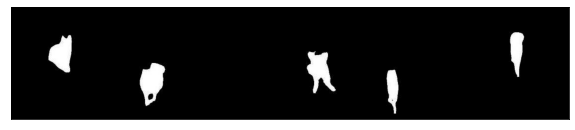

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


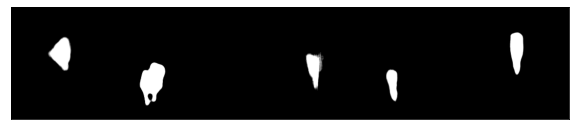



Train - Actual Depth


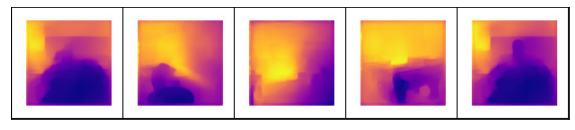

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


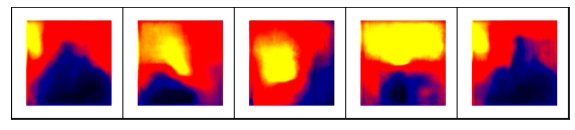

Best val loss: 0.326011
train: bce: 0.335258, dice: 0.393198, loss: 0.335258
train: bce: 0.336269, dice: 0.391677, loss: 0.336269
train: bce: 0.336629, dice: 0.393280, loss: 0.336629
train: bce: 0.335999, dice: 0.390660, loss: 0.335999
train: bce: 0.336004, dice: 0.390382, loss: 0.336004
train: bce: 0.335908, dice: 0.389936, loss: 0.335908
train: bce: 0.336075, dice: 0.390458, loss: 0.336075
train: bce: 0.336527, dice: 0.391079, loss: 0.336527
test: bce: 0.351376, dice: 0.430720, loss: 0.351376


Test - Actual mask: 40


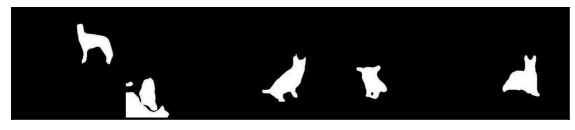

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


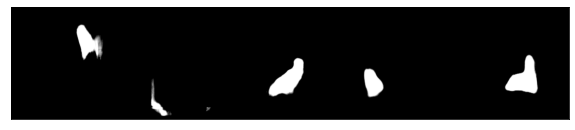



Test - Actual Depth


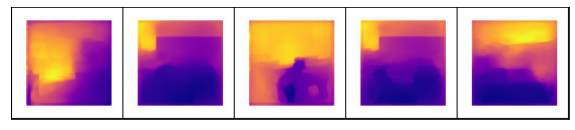

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


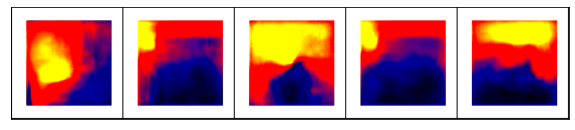

test: bce: 0.338059, dice: 0.385454, loss: 0.338059
test: bce: 0.337501, dice: 0.383850, loss: 0.337501
test: bce: 0.337986, dice: 0.386066, loss: 0.337986
************* 
Epoch: 40 	Training Loss: 0.326011 	Validation Loss: 0.337712

Validation loss decreased (0.339528 --> 0.337712).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
>>>>>>>> 
Epoch 41/40, LR: 0.01
train: bce: 0.344744, dice: 0.445932, loss: 0.344744
train: bce: 0.337026, dice: 0.390879, loss: 0.337026
train: bce: 0.337719, dice: 0.391195, loss: 0.337719
train: bce: 0.337377, dice: 0.391543, loss: 0.337377
train: bce: 0.336924, dice: 0.390384, loss: 0.336924
train: bce: 0.336903, dice: 0.391226, loss: 0.336903
train: bce: 0.336711, dice: 0.391086, loss: 0.336711
train: bce: 0.336915, dice: 0.391396, loss: 0.336915
train: bce: 0.336829, dice: 0.391327, loss: 0.336829
test: bce: 0.324901, dice: 0.398959, loss: 0.324901
test: bce: 0.338032, dice:

In [19]:
# First Time Training
test_loss_min_input = 1e+5
model, train_loss, test_loss = train_test_model(START_EPOCH, EPOCHS, test_loss_min_input, model, criterion, device, trainloader, testloader, optimizer, scheduler, save_path=MODEL_SAVE_PATH)
print(train_loss)
print(test_loss)

In [20]:
!ls '/content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models'

best_model.pth	       test_predicted_depth.png  train_actual_mask.png
test_actual_depth.png  test_predicted_mask.png	 train_predicted_depth.png
test_actual_mask.png   train_actual_depth.png	 train_predicted_mask.png
time: 3.87 s


41
41


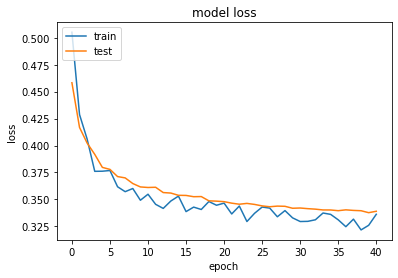

<Figure size 432x288 with 0 Axes>

time: 269 ms


In [21]:
plotmetrics(train_loss, test_loss, MODEL_SAVE_PATH)

##### Training - 2

30001
Last Epoch : 41, with loss: 0.33771218317747115
>>>>>>>> 
Epoch 41/60, LR: 0.01


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


train: bce: 0.785257, dice: 0.998975, loss: 0.785257
train: bce: 0.473971, dice: 0.903777, loss: 0.473971
train: bce: 0.445079, dice: 0.832059, loss: 0.445079
train: bce: 0.428486, dice: 0.779969, loss: 0.428486
train: bce: 0.417990, dice: 0.740682, loss: 0.417990
train: bce: 0.409465, dice: 0.709419, loss: 0.409465
train: bce: 0.402947, dice: 0.684548, loss: 0.402947
train: bce: 0.397870, dice: 0.665090, loss: 0.397870
train: bce: 0.393952, dice: 0.648902, loss: 0.393952
test: bce: 0.345825, dice: 0.484786, loss: 0.345825
test: bce: 0.360661, dice: 0.521479, loss: 0.360661
test: bce: 0.360224, dice: 0.520800, loss: 0.360224
test: bce: 0.359740, dice: 0.520976, loss: 0.359740
************* 
Epoch: 41 	Training Loss: 0.391138 	Validation Loss: 0.359763

>>>>>>>> 
Epoch 42/60, LR: 0.01
train: bce: 0.339675, dice: 0.495390, loss: 0.339675
train: bce: 0.363937, dice: 0.519624, loss: 0.363937
train: bce: 0.362964, dice: 0.519733, loss: 0.362964
train: bce: 0.361782, dice: 0.517129, loss: 0.

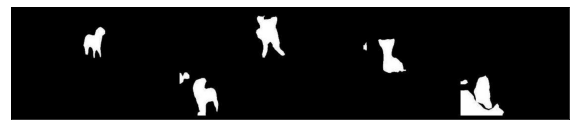

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


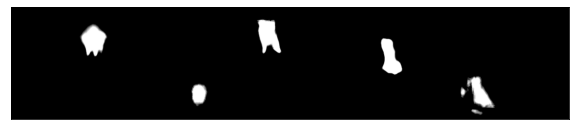



Train - Actual Depth


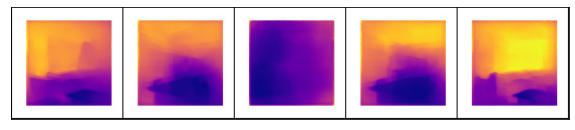

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


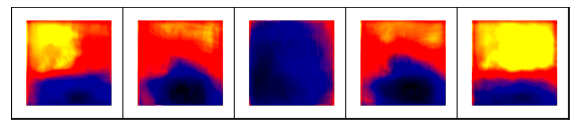

Best val loss: 0.351769
train: bce: 0.347249, dice: 0.457035, loss: 0.347249
train: bce: 0.347113, dice: 0.454232, loss: 0.347113
train: bce: 0.346749, dice: 0.450048, loss: 0.346749
train: bce: 0.346842, dice: 0.450032, loss: 0.346842
train: bce: 0.346134, dice: 0.447486, loss: 0.346134
train: bce: 0.345895, dice: 0.446369, loss: 0.345895
train: bce: 0.346116, dice: 0.446572, loss: 0.346116
train: bce: 0.346098, dice: 0.445839, loss: 0.346098
test: bce: 0.352958, dice: 0.469312, loss: 0.352958


Test - Actual mask: 44


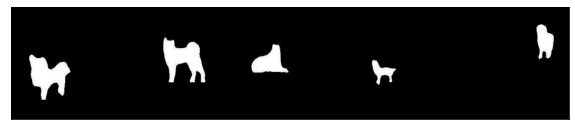

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


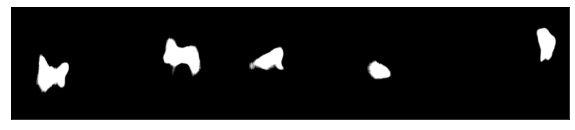



Test - Actual Depth


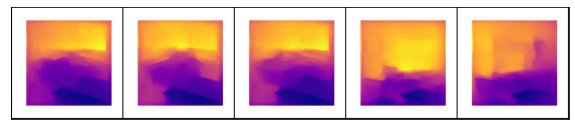

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


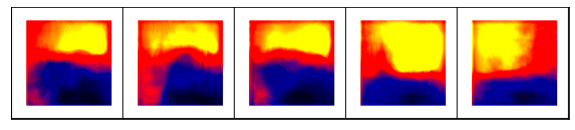

test: bce: 0.344380, dice: 0.446987, loss: 0.344380
test: bce: 0.345706, dice: 0.450310, loss: 0.345706
test: bce: 0.345331, dice: 0.450038, loss: 0.345331
************* 
Epoch: 44 	Training Loss: 0.344395 	Validation Loss: 0.345315

>>>>>>>> 
Epoch 45/60, LR: 0.01
train: bce: 0.354151, dice: 0.438892, loss: 0.354151
train: bce: 0.343383, dice: 0.428206, loss: 0.343383
train: bce: 0.344271, dice: 0.433392, loss: 0.344271
train: bce: 0.344016, dice: 0.435710, loss: 0.344016
train: bce: 0.343733, dice: 0.433780, loss: 0.343733
train: bce: 0.343906, dice: 0.435741, loss: 0.343906
train: bce: 0.343782, dice: 0.436592, loss: 0.343782
train: bce: 0.343551, dice: 0.435634, loss: 0.343551
train: bce: 0.343499, dice: 0.434490, loss: 0.343499
test: bce: 0.358898, dice: 0.472714, loss: 0.358898
test: bce: 0.340356, dice: 0.424747, loss: 0.340356
test: bce: 0.342260, dice: 0.430749, loss: 0.342260
test: bce: 0.341758, dice: 0.430745, loss: 0.341758
************* 
Epoch: 45 	Training Loss: 0.341919

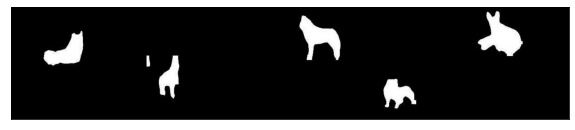

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


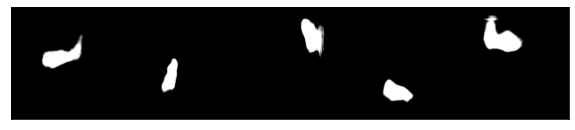



Train - Actual Depth


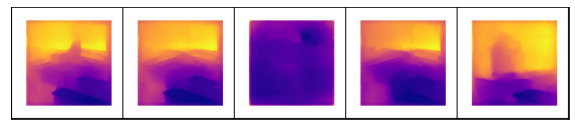

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


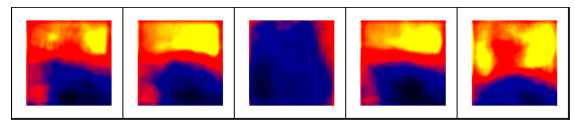

Best val loss: 0.338176
train: bce: 0.337938, dice: 0.411634, loss: 0.337938
train: bce: 0.338305, dice: 0.412201, loss: 0.338305
train: bce: 0.338002, dice: 0.410653, loss: 0.338002
train: bce: 0.338571, dice: 0.412253, loss: 0.338571
train: bce: 0.338421, dice: 0.410783, loss: 0.338421
train: bce: 0.338720, dice: 0.411869, loss: 0.338720
train: bce: 0.338841, dice: 0.412933, loss: 0.338841
train: bce: 0.338773, dice: 0.412967, loss: 0.338773
test: bce: 0.330066, dice: 0.429848, loss: 0.330066


Test - Actual mask: 48


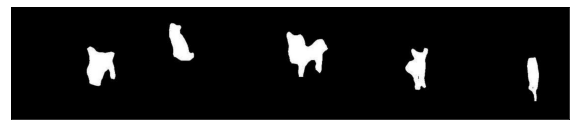

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


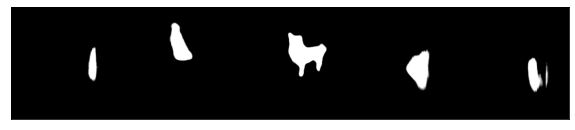



Test - Actual Depth


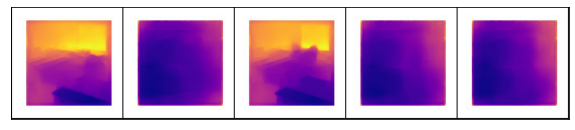



Test - Predicted Depth


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


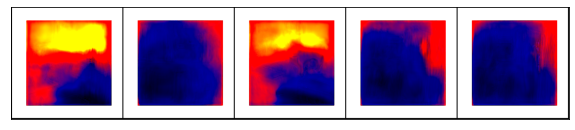

test: bce: 0.338016, dice: 0.416272, loss: 0.338016
test: bce: 0.338748, dice: 0.421229, loss: 0.338748
test: bce: 0.338636, dice: 0.420465, loss: 0.338636
************* 
Epoch: 48 	Training Loss: 0.337511 	Validation Loss: 0.338361

>>>>>>>> 
Epoch 49/60, LR: 0.01
train: bce: 0.341726, dice: 0.435184, loss: 0.341726
train: bce: 0.339377, dice: 0.413967, loss: 0.339377
train: bce: 0.339093, dice: 0.411243, loss: 0.339093
train: bce: 0.339161, dice: 0.414463, loss: 0.339161
train: bce: 0.339014, dice: 0.413842, loss: 0.339014
train: bce: 0.338932, dice: 0.414181, loss: 0.338932
train: bce: 0.338597, dice: 0.413257, loss: 0.338597
train: bce: 0.338584, dice: 0.412225, loss: 0.338584
train: bce: 0.338629, dice: 0.412109, loss: 0.338629
test: bce: 0.333387, dice: 0.425855, loss: 0.333387
test: bce: 0.337451, dice: 0.412795, loss: 0.337451
test: bce: 0.336675, dice: 0.408580, loss: 0.336675
test: bce: 0.336969, dice: 0.407931, loss: 0.336969
************* 
Epoch: 49 	Training Loss: 0.336235

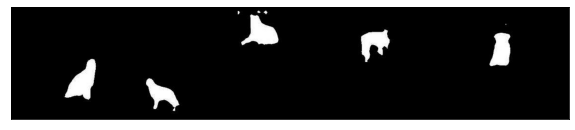

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


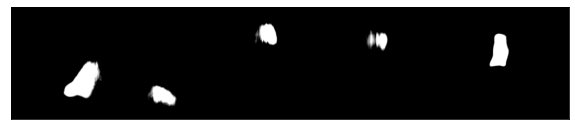



Train - Actual Depth


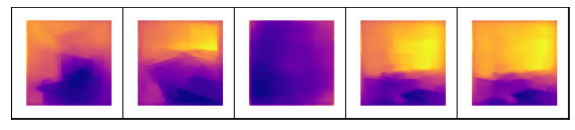



Train - Predicted Depth


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


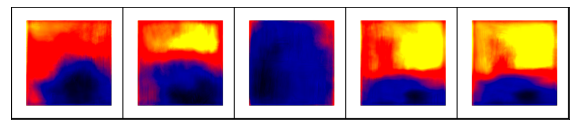

Best val loss: 0.326490
train: bce: 0.335623, dice: 0.392200, loss: 0.335623
train: bce: 0.336371, dice: 0.396711, loss: 0.336371
train: bce: 0.336305, dice: 0.397965, loss: 0.336305
train: bce: 0.335767, dice: 0.397146, loss: 0.335767
train: bce: 0.335555, dice: 0.397540, loss: 0.335555
train: bce: 0.335849, dice: 0.398586, loss: 0.335849
train: bce: 0.335520, dice: 0.397772, loss: 0.335520
train: bce: 0.335374, dice: 0.397498, loss: 0.335374
test: bce: 0.333303, dice: 0.391703, loss: 0.333303


Test - Actual mask: 52


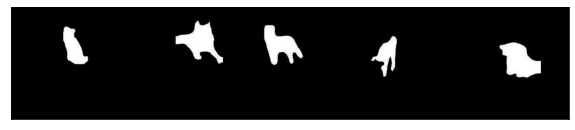

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


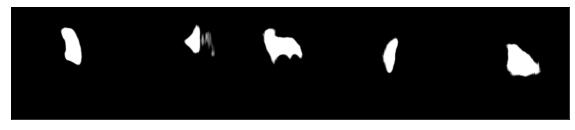



Test - Actual Depth


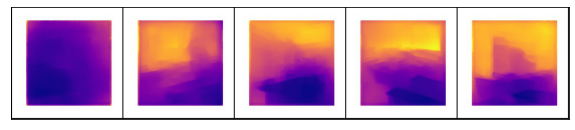

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


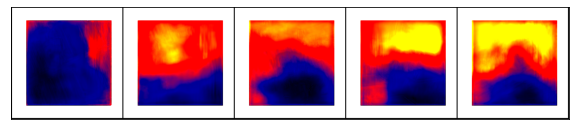

test: bce: 0.333772, dice: 0.388126, loss: 0.333772
test: bce: 0.334320, dice: 0.393098, loss: 0.334320
test: bce: 0.334955, dice: 0.394039, loss: 0.334955
************* 
Epoch: 52 	Training Loss: 0.326490 	Validation Loss: 0.335315

>>>>>>>> 
Epoch 53/60, LR: 0.01
train: bce: 0.326512, dice: 0.398863, loss: 0.326512
train: bce: 0.334124, dice: 0.390013, loss: 0.334124
train: bce: 0.334709, dice: 0.393550, loss: 0.334709
train: bce: 0.335369, dice: 0.394331, loss: 0.335369
train: bce: 0.335338, dice: 0.395178, loss: 0.335338
train: bce: 0.335435, dice: 0.395910, loss: 0.335435
train: bce: 0.335141, dice: 0.395826, loss: 0.335141
train: bce: 0.335029, dice: 0.395600, loss: 0.335029
train: bce: 0.334961, dice: 0.396067, loss: 0.334961
test: bce: 0.345022, dice: 0.457623, loss: 0.345022
test: bce: 0.335093, dice: 0.388724, loss: 0.335093
test: bce: 0.336302, dice: 0.389840, loss: 0.336302
test: bce: 0.335553, dice: 0.390249, loss: 0.335553
************* 
Epoch: 53 	Training Loss: 0.326512

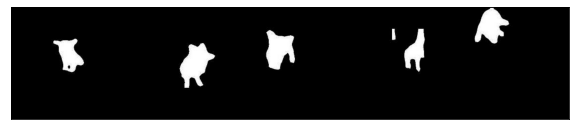

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


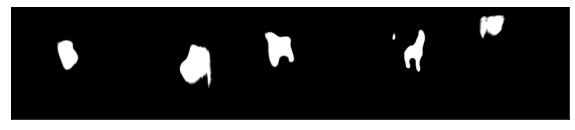



Train - Actual Depth


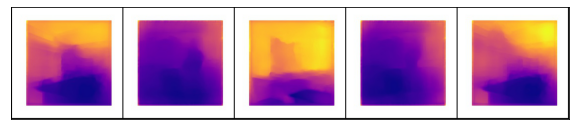

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


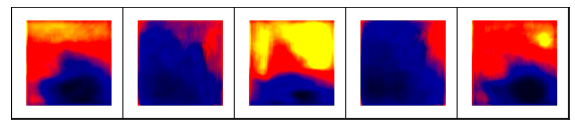

Best val loss: 0.329616
train: bce: 0.335611, dice: 0.397639, loss: 0.335611
train: bce: 0.334709, dice: 0.394948, loss: 0.334709
train: bce: 0.334661, dice: 0.394116, loss: 0.334661
train: bce: 0.334524, dice: 0.394000, loss: 0.334524
train: bce: 0.334225, dice: 0.393483, loss: 0.334225
train: bce: 0.333904, dice: 0.392093, loss: 0.333904
train: bce: 0.333905, dice: 0.391257, loss: 0.333905
train: bce: 0.333665, dice: 0.390437, loss: 0.333665
test: bce: 0.334787, dice: 0.385671, loss: 0.334787


Test - Actual mask: 56


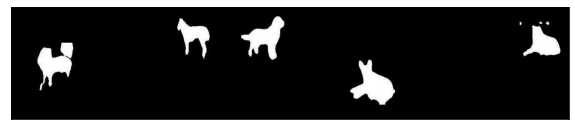

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


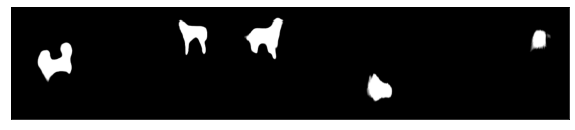



Test - Actual Depth


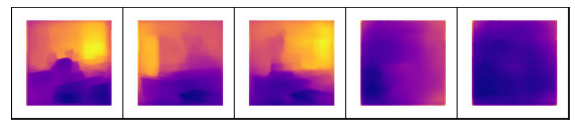

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


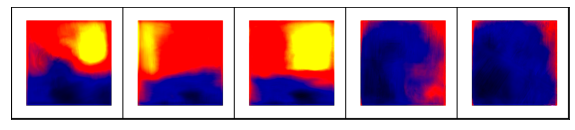

test: bce: 0.331719, dice: 0.386676, loss: 0.331719
test: bce: 0.332234, dice: 0.385372, loss: 0.332234
test: bce: 0.333011, dice: 0.388560, loss: 0.333011
************* 
Epoch: 56 	Training Loss: 0.329616 	Validation Loss: 0.332801

Validation loss decreased (0.333682 --> 0.332801).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
>>>>>>>> 
Epoch 57/60, LR: 0.01
train: bce: 0.332026, dice: 0.369510, loss: 0.332026
train: bce: 0.332338, dice: 0.380627, loss: 0.332338
train: bce: 0.331749, dice: 0.382124, loss: 0.331749
train: bce: 0.332856, dice: 0.386890, loss: 0.332856
train: bce: 0.332908, dice: 0.386305, loss: 0.332908
train: bce: 0.332686, dice: 0.385957, loss: 0.332686
train: bce: 0.332721, dice: 0.385413, loss: 0.332721
train: bce: 0.332684, dice: 0.384787, loss: 0.332684
train: bce: 0.332558, dice: 0.383845, loss: 0.332558
test: bce: 0.330721, dice: 0.374170, loss: 0.330721
test: bce: 0.333207, dice:

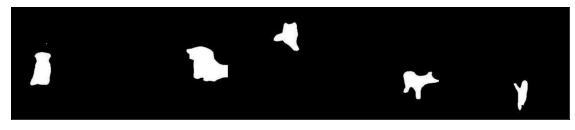

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


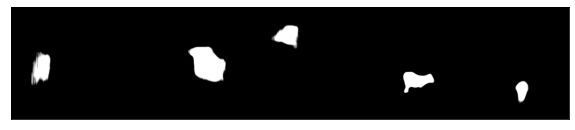



Train - Actual Depth


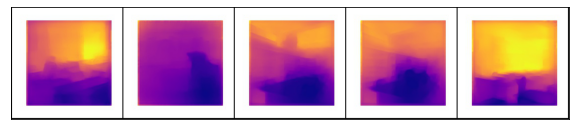

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


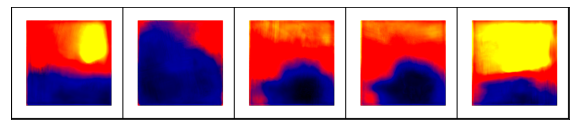

Best val loss: 0.322771
train: bce: 0.331828, dice: 0.385573, loss: 0.331828
train: bce: 0.332287, dice: 0.381919, loss: 0.332287
train: bce: 0.332006, dice: 0.382340, loss: 0.332006
train: bce: 0.331680, dice: 0.381002, loss: 0.331680
train: bce: 0.331668, dice: 0.382297, loss: 0.331668
train: bce: 0.332039, dice: 0.382764, loss: 0.332039
train: bce: 0.332169, dice: 0.382532, loss: 0.332169
train: bce: 0.331857, dice: 0.382437, loss: 0.331857
test: bce: 0.323756, dice: 0.347644, loss: 0.323756


Test - Actual mask: 60


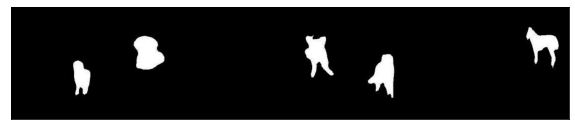

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


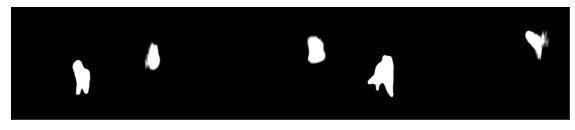



Test - Actual Depth


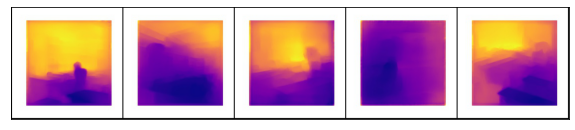

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


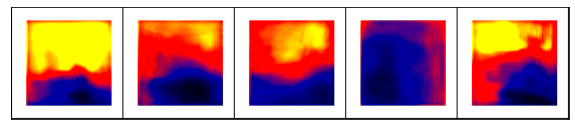

test: bce: 0.332552, dice: 0.376776, loss: 0.332552
test: bce: 0.333139, dice: 0.379313, loss: 0.333139
test: bce: 0.333544, dice: 0.380502, loss: 0.333544
************* 
Epoch: 60 	Training Loss: 0.322771 	Validation Loss: 0.332966

>>>>>>>> 
Epoch 61/60, LR: 0.01
train: bce: 0.345699, dice: 0.403363, loss: 0.345699
train: bce: 0.332409, dice: 0.380564, loss: 0.332409
train: bce: 0.331911, dice: 0.379574, loss: 0.331911
train: bce: 0.332185, dice: 0.381941, loss: 0.332185
train: bce: 0.331989, dice: 0.381147, loss: 0.331989
train: bce: 0.331594, dice: 0.380285, loss: 0.331594
train: bce: 0.331515, dice: 0.379961, loss: 0.331515
train: bce: 0.331515, dice: 0.379800, loss: 0.331515
train: bce: 0.331586, dice: 0.380459, loss: 0.331586
test: bce: 0.335491, dice: 0.400317, loss: 0.335491
test: bce: 0.329867, dice: 0.377889, loss: 0.329867
test: bce: 0.330300, dice: 0.371672, loss: 0.330300
test: bce: 0.330658, dice: 0.376278, loss: 0.330658
************* 
Epoch: 61 	Training Loss: 0.331096

In [15]:
# Load and re-train model

batchzipfilepath = ZIP_FILES_PATH + BATCH_2_ZIP
trainloader, testloader = loaddataset(batchzipfilepath, transformtrain, batch_size=BATCH_SIZE)

model, optimizer, last_epoch, test_loss_min = loadcheckpoint(BEST_MODEL_PATH, model, optimizer)
print('Last Epoch : {}, with loss: {}'.format(last_epoch, test_loss_min))

model, train_loss, test_loss = train_test_model(last_epoch, EPOCHS, test_loss_min, model, criterion, device, trainloader, testloader, optimizer, save_path=MODEL_SAVE_PATH)

21
21


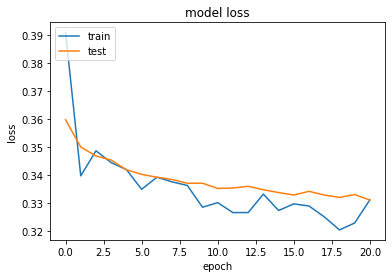

<Figure size 432x288 with 0 Axes>

time: 265 ms


In [16]:
plotmetrics(train_loss, test_loss, METRICS_PATH)

#### Training - 3

30001
Last Epoch : 62, with loss: 0.3309582481980324
>>>>>>>> 
Epoch 62/81, LR: 0.01


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


train: bce: 0.687397, dice: 0.955200, loss: 0.687397
train: bce: 0.468202, dice: 0.885351, loss: 0.468202
train: bce: 0.433254, dice: 0.772294, loss: 0.433254
train: bce: 0.416160, dice: 0.708530, loss: 0.416160
train: bce: 0.404141, dice: 0.666326, loss: 0.404141
train: bce: 0.396415, dice: 0.633872, loss: 0.396415
train: bce: 0.391230, dice: 0.613326, loss: 0.391230
train: bce: 0.387029, dice: 0.594602, loss: 0.387029
train: bce: 0.383259, dice: 0.579835, loss: 0.383259
test: bce: 0.348882, dice: 0.526268, loss: 0.348882
test: bce: 0.358013, dice: 0.479510, loss: 0.358013
test: bce: 0.358111, dice: 0.478465, loss: 0.358111
test: bce: 0.358129, dice: 0.480920, loss: 0.358129
************* 
Epoch: 62 	Training Loss: 0.381199 	Validation Loss: 0.358590

>>>>>>>> 
Epoch 63/81, LR: 0.01
train: bce: 0.353220, dice: 0.454556, loss: 0.353220
train: bce: 0.355059, dice: 0.467418, loss: 0.355059
train: bce: 0.354320, dice: 0.459962, loss: 0.354320
train: bce: 0.353924, dice: 0.458042, loss: 0.

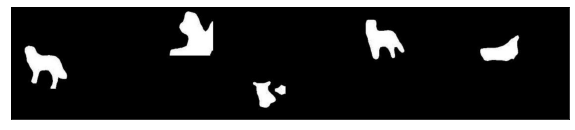

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


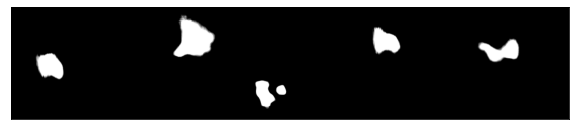



Train - Actual Depth


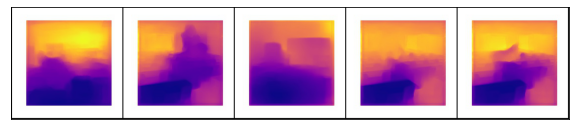

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


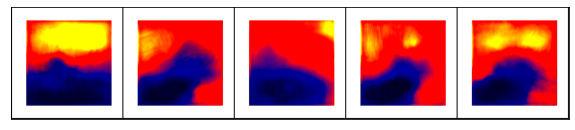

Best val loss: 0.355043
train: bce: 0.347500, dice: 0.434912, loss: 0.347500
train: bce: 0.349042, dice: 0.438924, loss: 0.349042
train: bce: 0.349123, dice: 0.437899, loss: 0.349123
train: bce: 0.348674, dice: 0.436827, loss: 0.348674
train: bce: 0.348532, dice: 0.436690, loss: 0.348532
train: bce: 0.347985, dice: 0.435858, loss: 0.347985
train: bce: 0.347919, dice: 0.434299, loss: 0.347919
train: bce: 0.347631, dice: 0.431709, loss: 0.347631
test: bce: 0.331929, dice: 0.400400, loss: 0.331929


Test - Actual mask: 64


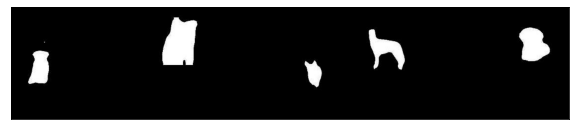

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


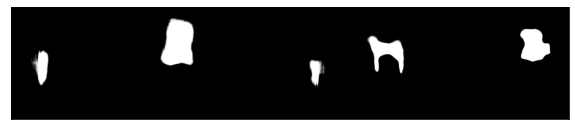



Test - Actual Depth


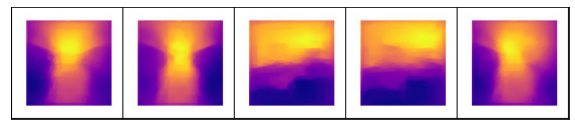



Test - Predicted Depth


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


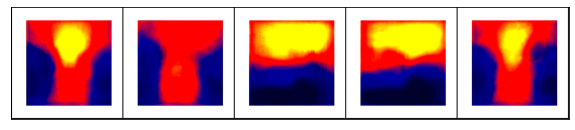

test: bce: 0.346919, dice: 0.426794, loss: 0.346919
test: bce: 0.345785, dice: 0.419821, loss: 0.345785
test: bce: 0.345921, dice: 0.418259, loss: 0.345921
************* 
Epoch: 64 	Training Loss: 0.344912 	Validation Loss: 0.345453

>>>>>>>> 
Epoch 65/81, LR: 0.01
train: bce: 0.344137, dice: 0.396866, loss: 0.344137
train: bce: 0.345179, dice: 0.422831, loss: 0.345179
train: bce: 0.345356, dice: 0.424113, loss: 0.345356
train: bce: 0.345802, dice: 0.421540, loss: 0.345802
train: bce: 0.345849, dice: 0.421325, loss: 0.345849
train: bce: 0.345333, dice: 0.419871, loss: 0.345333
train: bce: 0.345130, dice: 0.419121, loss: 0.345130
train: bce: 0.345129, dice: 0.419174, loss: 0.345129
train: bce: 0.345135, dice: 0.419594, loss: 0.345135
test: bce: 0.341623, dice: 0.393385, loss: 0.341623
test: bce: 0.345837, dice: 0.418644, loss: 0.345837
test: bce: 0.344615, dice: 0.420150, loss: 0.344615
test: bce: 0.343530, dice: 0.415992, loss: 0.343530
************* 
Epoch: 65 	Training Loss: 0.344137

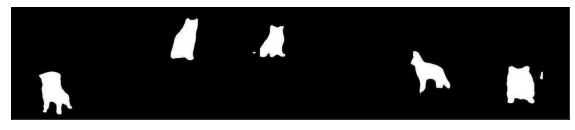

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


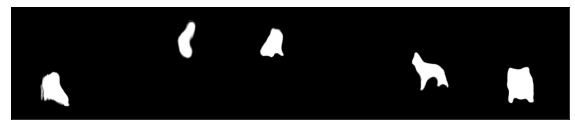



Train - Actual Depth


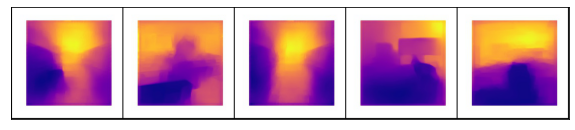

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


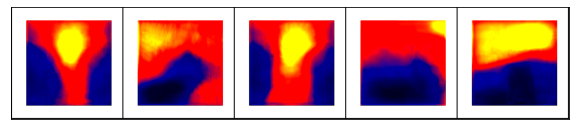

Best val loss: 0.323950
train: bce: 0.341397, dice: 0.402454, loss: 0.341397
train: bce: 0.341837, dice: 0.402339, loss: 0.341837
train: bce: 0.341582, dice: 0.401891, loss: 0.341582
train: bce: 0.341395, dice: 0.398651, loss: 0.341395
train: bce: 0.340932, dice: 0.397365, loss: 0.340932
train: bce: 0.340963, dice: 0.398894, loss: 0.340963
train: bce: 0.340794, dice: 0.398534, loss: 0.340794
train: bce: 0.340848, dice: 0.399959, loss: 0.340848
test: bce: 0.353210, dice: 0.410595, loss: 0.353210


Test - Actual mask: 68


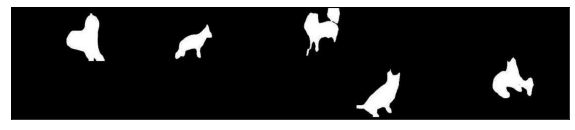

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


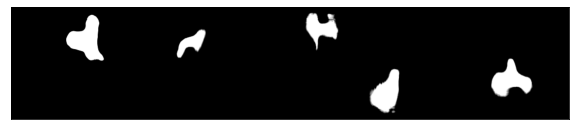



Test - Actual Depth


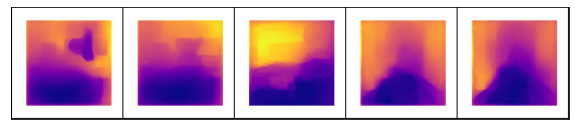

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


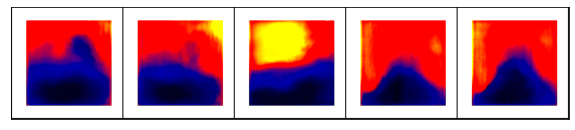

test: bce: 0.341037, dice: 0.401636, loss: 0.341037
test: bce: 0.340284, dice: 0.400117, loss: 0.340284
test: bce: 0.340393, dice: 0.400564, loss: 0.340393
************* 
Epoch: 68 	Training Loss: 0.323289 	Validation Loss: 0.340432

>>>>>>>> 
Epoch 69/81, LR: 0.01
train: bce: 0.334376, dice: 0.396939, loss: 0.334376
train: bce: 0.340051, dice: 0.392002, loss: 0.340051
train: bce: 0.339719, dice: 0.394409, loss: 0.339719
train: bce: 0.339272, dice: 0.397871, loss: 0.339272
train: bce: 0.339054, dice: 0.397193, loss: 0.339054
train: bce: 0.339487, dice: 0.396935, loss: 0.339487
train: bce: 0.339353, dice: 0.395594, loss: 0.339353
train: bce: 0.339570, dice: 0.395307, loss: 0.339570
train: bce: 0.339287, dice: 0.393877, loss: 0.339287
test: bce: 0.348965, dice: 0.438399, loss: 0.348965
test: bce: 0.338800, dice: 0.388368, loss: 0.338800
test: bce: 0.339635, dice: 0.388656, loss: 0.339635
test: bce: 0.338984, dice: 0.388389, loss: 0.338984
************* 
Epoch: 69 	Training Loss: 0.332771

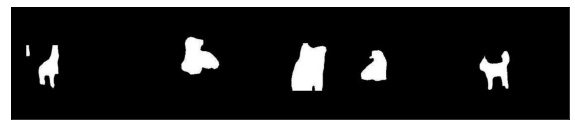

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


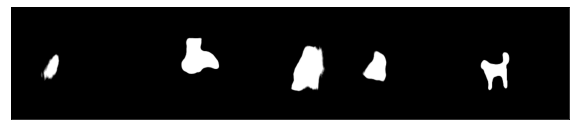



Train - Actual Depth


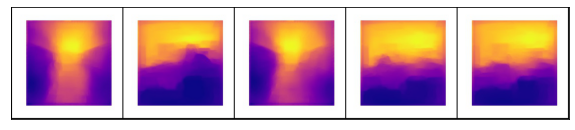

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


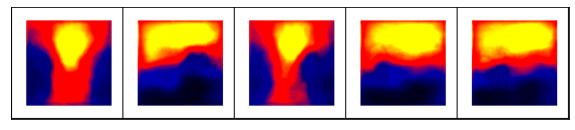

Best val loss: 0.335861
train: bce: 0.337930, dice: 0.386223, loss: 0.337930
train: bce: 0.336764, dice: 0.383656, loss: 0.336764
train: bce: 0.337159, dice: 0.384880, loss: 0.337159
train: bce: 0.336602, dice: 0.385738, loss: 0.336602
train: bce: 0.337141, dice: 0.384935, loss: 0.337141
train: bce: 0.337292, dice: 0.385764, loss: 0.337292
train: bce: 0.337186, dice: 0.384980, loss: 0.337186
train: bce: 0.337306, dice: 0.385692, loss: 0.337306
test: bce: 0.334862, dice: 0.345192, loss: 0.334862


Test - Actual mask: 72


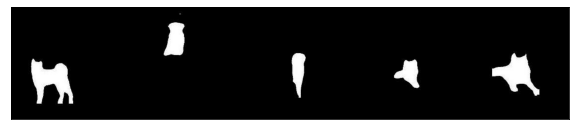

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


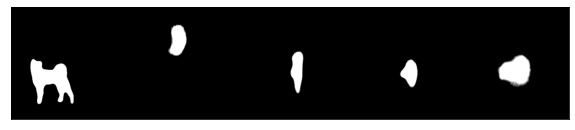



Test - Actual Depth


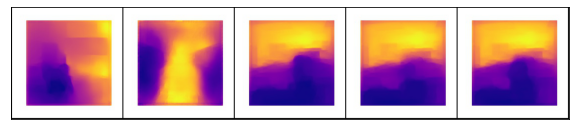

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


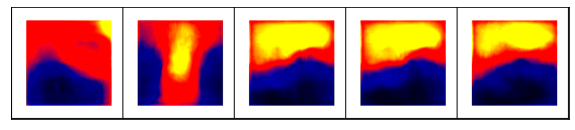

test: bce: 0.336737, dice: 0.381613, loss: 0.336737
test: bce: 0.337187, dice: 0.383506, loss: 0.337187
test: bce: 0.337566, dice: 0.386793, loss: 0.337566
************* 
Epoch: 72 	Training Loss: 0.334699 	Validation Loss: 0.337761

>>>>>>>> 
Epoch 73/81, LR: 0.01
train: bce: 0.343855, dice: 0.364927, loss: 0.343855
train: bce: 0.339380, dice: 0.388937, loss: 0.339380
train: bce: 0.338084, dice: 0.386225, loss: 0.338084
train: bce: 0.337578, dice: 0.387274, loss: 0.337578
train: bce: 0.337700, dice: 0.387174, loss: 0.337700
train: bce: 0.337799, dice: 0.386876, loss: 0.337799
train: bce: 0.337595, dice: 0.386769, loss: 0.337595
train: bce: 0.337486, dice: 0.386518, loss: 0.337486
train: bce: 0.337411, dice: 0.386544, loss: 0.337411
test: bce: 0.331142, dice: 0.328467, loss: 0.331142
test: bce: 0.336154, dice: 0.381410, loss: 0.336154
test: bce: 0.336856, dice: 0.385315, loss: 0.336856
test: bce: 0.336640, dice: 0.386919, loss: 0.336640
************* 
Epoch: 73 	Training Loss: 0.336463

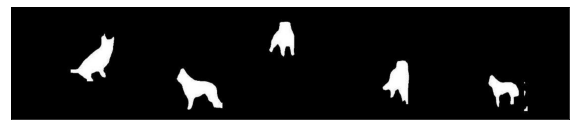

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


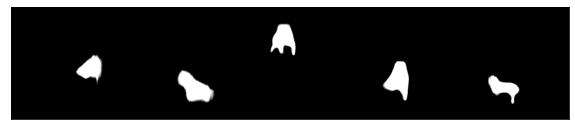



Train - Actual Depth


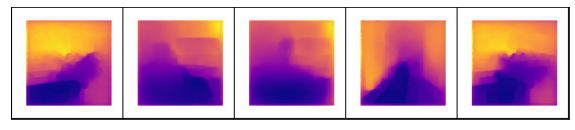

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


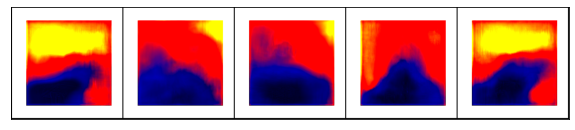

Best val loss: 0.349498
train: bce: 0.337141, dice: 0.380350, loss: 0.337141
train: bce: 0.335711, dice: 0.377135, loss: 0.335711
train: bce: 0.335577, dice: 0.376277, loss: 0.335577
train: bce: 0.334816, dice: 0.373973, loss: 0.334816
train: bce: 0.334967, dice: 0.374936, loss: 0.334967
train: bce: 0.334869, dice: 0.375742, loss: 0.334869
train: bce: 0.335460, dice: 0.376833, loss: 0.335460
train: bce: 0.335442, dice: 0.377190, loss: 0.335442
test: bce: 0.340500, dice: 0.356017, loss: 0.340500


Test - Actual mask: 76


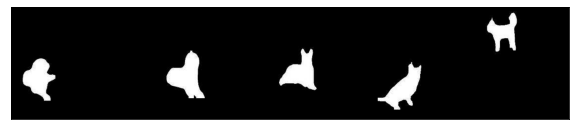

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


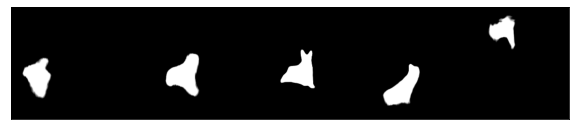



Test - Actual Depth


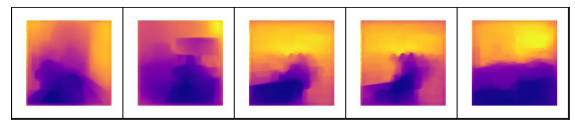

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


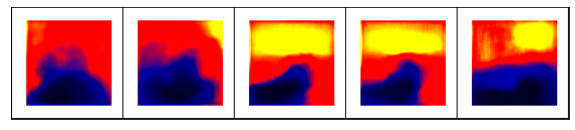

test: bce: 0.340330, dice: 0.387598, loss: 0.340330
test: bce: 0.338329, dice: 0.382676, loss: 0.338329
test: bce: 0.338636, dice: 0.382950, loss: 0.338636
************* 
Epoch: 76 	Training Loss: 0.334808 	Validation Loss: 0.338811

>>>>>>>> 
Epoch 77/81, LR: 0.01
train: bce: 0.338840, dice: 0.410284, loss: 0.338840
train: bce: 0.335619, dice: 0.375490, loss: 0.335619
train: bce: 0.334806, dice: 0.372852, loss: 0.334806
train: bce: 0.334815, dice: 0.373755, loss: 0.334815
train: bce: 0.334648, dice: 0.373022, loss: 0.334648
train: bce: 0.334787, dice: 0.374235, loss: 0.334787
train: bce: 0.334277, dice: 0.374567, loss: 0.334277
train: bce: 0.334537, dice: 0.374376, loss: 0.334537
train: bce: 0.334915, dice: 0.375103, loss: 0.334915
test: bce: 0.334431, dice: 0.391361, loss: 0.334431
test: bce: 0.336216, dice: 0.377657, loss: 0.336216
test: bce: 0.336442, dice: 0.374338, loss: 0.336442
test: bce: 0.336873, dice: 0.375164, loss: 0.336873
************* 
Epoch: 77 	Training Loss: 0.332920

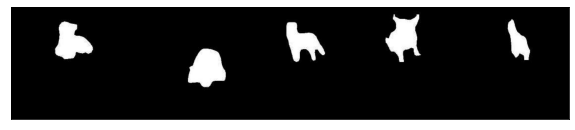

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


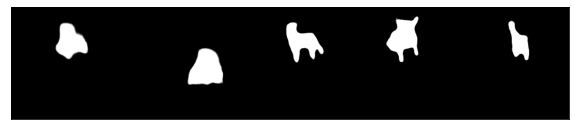



Train - Actual Depth


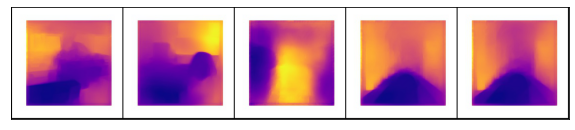

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


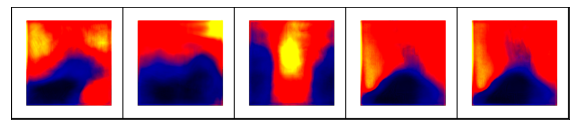

Best val loss: 0.335197
train: bce: 0.333991, dice: 0.372058, loss: 0.333991
train: bce: 0.334650, dice: 0.370860, loss: 0.334650
train: bce: 0.335037, dice: 0.370704, loss: 0.335037
train: bce: 0.334568, dice: 0.369995, loss: 0.334568
train: bce: 0.334691, dice: 0.371292, loss: 0.334691
train: bce: 0.334476, dice: 0.370768, loss: 0.334476
train: bce: 0.334194, dice: 0.371017, loss: 0.334194
train: bce: 0.334355, dice: 0.371700, loss: 0.334355
test: bce: 0.324565, dice: 0.340413, loss: 0.324565


Test - Actual mask: 80


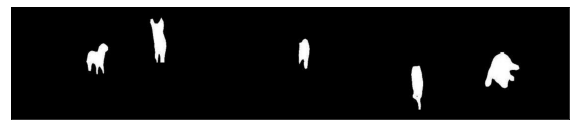

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


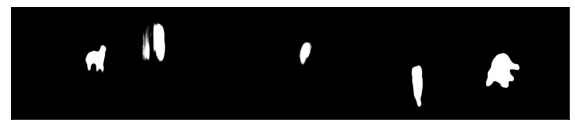



Test - Actual Depth


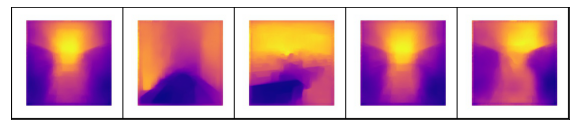

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


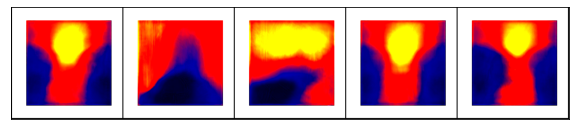

test: bce: 0.335197, dice: 0.375334, loss: 0.335197
test: bce: 0.334306, dice: 0.375238, loss: 0.334306
test: bce: 0.334753, dice: 0.373769, loss: 0.334753
************* 
Epoch: 80 	Training Loss: 0.328424 	Validation Loss: 0.334874

>>>>>>>> 
Epoch 81/81, LR: 0.01
train: bce: 0.321990, dice: 0.321863, loss: 0.321990
train: bce: 0.334182, dice: 0.374753, loss: 0.334182
train: bce: 0.333416, dice: 0.369397, loss: 0.333416
train: bce: 0.333579, dice: 0.370315, loss: 0.333579
train: bce: 0.333604, dice: 0.370935, loss: 0.333604
train: bce: 0.333433, dice: 0.369212, loss: 0.333433
train: bce: 0.333535, dice: 0.369889, loss: 0.333535
train: bce: 0.333875, dice: 0.370425, loss: 0.333875
train: bce: 0.333798, dice: 0.370273, loss: 0.333798
test: bce: 0.332939, dice: 0.358306, loss: 0.332939
test: bce: 0.333608, dice: 0.369117, loss: 0.333608
test: bce: 0.333590, dice: 0.371444, loss: 0.333590
test: bce: 0.333958, dice: 0.372232, loss: 0.333958
************* 
Epoch: 81 	Training Loss: 0.321990

In [33]:
# Load and re-train model

batchzipfilepath = ZIP_FILES_PATH + BATCH_3_ZIP
trainloader, testloader = loaddataset(batchzipfilepath, transformtrain, batch_size=BATCH_SIZE)

model, optimizer, last_epoch, test_loss_min = loadcheckpoint(BEST_MODEL_PATH, model, optimizer)
print('Last Epoch : {}, with loss: {}'.format(last_epoch, test_loss_min))

model, train_loss, test_loss = train_test_model(last_epoch, EPOCHS, test_loss_min, model, criterion, device, trainloader, testloader, optimizer, save_path=MODEL_SAVE_PATH)

In [0]:
plotmetrics(train_loss, test_loss, METRICS_PATH)

#### Training - 4

30001
Last Epoch : 62, with loss: 0.3309582481980324
>>>>>>>> 
Epoch 62/71, LR: 0.01


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


train: bce: 0.590348, dice: 0.853057, loss: 0.590348
train: bce: 0.448340, dice: 0.848946, loss: 0.448340
train: bce: 0.415777, dice: 0.744651, loss: 0.415777
train: bce: 0.399679, dice: 0.683214, loss: 0.399679
train: bce: 0.389550, dice: 0.643634, loss: 0.389550
train: bce: 0.382220, dice: 0.616451, loss: 0.382220
train: bce: 0.377031, dice: 0.594164, loss: 0.377031
train: bce: 0.372590, dice: 0.576767, loss: 0.372590
train: bce: 0.369206, dice: 0.563571, loss: 0.369206
test: bce: 0.339069, dice: 0.424980, loss: 0.339069
test: bce: 0.341131, dice: 0.436613, loss: 0.341131
test: bce: 0.342498, dice: 0.441227, loss: 0.342498
test: bce: 0.342389, dice: 0.444089, loss: 0.342389
************* 
Epoch: 62 	Training Loss: 0.367187 	Validation Loss: 0.342416

>>>>>>>> 
Epoch 63/71, LR: 0.01
train: bce: 0.339695, dice: 0.423089, loss: 0.339695
train: bce: 0.342262, dice: 0.454332, loss: 0.342262
train: bce: 0.342214, dice: 0.454982, loss: 0.342214
train: bce: 0.341201, dice: 0.450569, loss: 0.

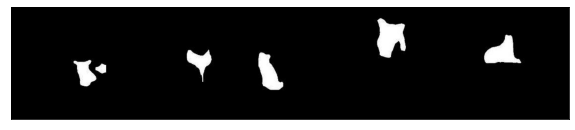

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


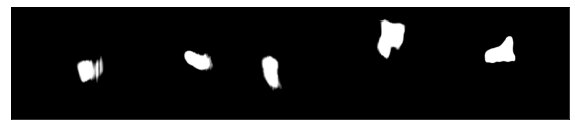



Train - Actual Depth


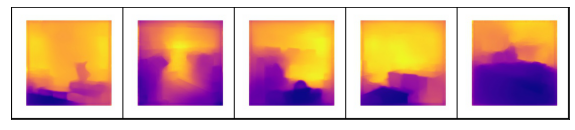

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


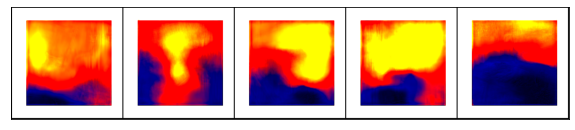

Best val loss: 0.335559
train: bce: 0.333530, dice: 0.417891, loss: 0.333530
train: bce: 0.333992, dice: 0.421080, loss: 0.333992
train: bce: 0.334192, dice: 0.420241, loss: 0.334192
train: bce: 0.334152, dice: 0.420852, loss: 0.334152
train: bce: 0.334209, dice: 0.421492, loss: 0.334209
train: bce: 0.334316, dice: 0.420704, loss: 0.334316
train: bce: 0.333987, dice: 0.421335, loss: 0.333987
train: bce: 0.333981, dice: 0.421281, loss: 0.333981
test: bce: 0.332136, dice: 0.392560, loss: 0.332136


Test - Actual mask: 64


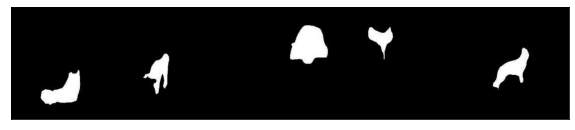

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


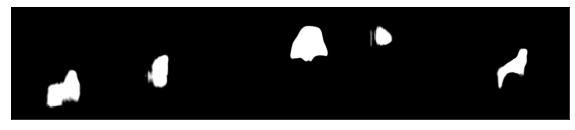



Test - Actual Depth


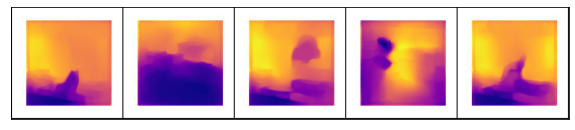

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


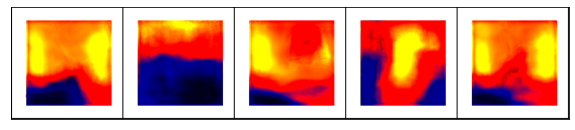

test: bce: 0.334716, dice: 0.425669, loss: 0.334716
test: bce: 0.334560, dice: 0.424732, loss: 0.334560
test: bce: 0.334240, dice: 0.422844, loss: 0.334240
************* 
Epoch: 64 	Training Loss: 0.331914 	Validation Loss: 0.333559

>>>>>>>> 
Epoch 65/71, LR: 0.01
train: bce: 0.338148, dice: 0.420561, loss: 0.338148
train: bce: 0.332206, dice: 0.417955, loss: 0.332206
train: bce: 0.332846, dice: 0.414908, loss: 0.332846
train: bce: 0.332364, dice: 0.414612, loss: 0.332364
train: bce: 0.332352, dice: 0.413803, loss: 0.332352
train: bce: 0.331843, dice: 0.412097, loss: 0.331843
train: bce: 0.332149, dice: 0.411989, loss: 0.332149
train: bce: 0.331887, dice: 0.411854, loss: 0.331887
train: bce: 0.331751, dice: 0.411245, loss: 0.331751
test: bce: 0.321969, dice: 0.348774, loss: 0.321969
test: bce: 0.329078, dice: 0.395645, loss: 0.329078
test: bce: 0.328700, dice: 0.393631, loss: 0.328700
test: bce: 0.329282, dice: 0.397046, loss: 0.329282
************* 
Epoch: 65 	Training Loss: 0.330615

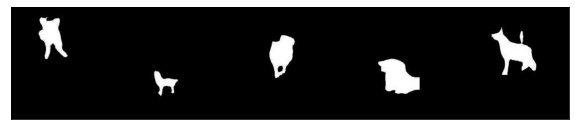

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


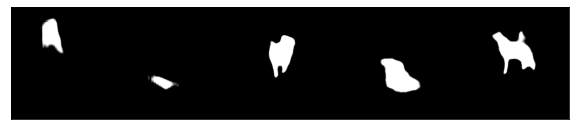



Train - Actual Depth


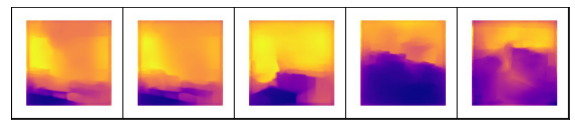

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


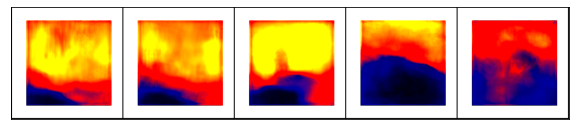

Best val loss: 0.326363
train: bce: 0.327533, dice: 0.396575, loss: 0.327533
train: bce: 0.327812, dice: 0.391896, loss: 0.327812
train: bce: 0.328743, dice: 0.395073, loss: 0.328743
train: bce: 0.328073, dice: 0.394685, loss: 0.328073
train: bce: 0.328255, dice: 0.394071, loss: 0.328255
train: bce: 0.327931, dice: 0.393179, loss: 0.327931
train: bce: 0.327477, dice: 0.392278, loss: 0.327477
train: bce: 0.327484, dice: 0.392090, loss: 0.327484
test: bce: 0.334744, dice: 0.394496, loss: 0.334744


Test - Actual mask: 68


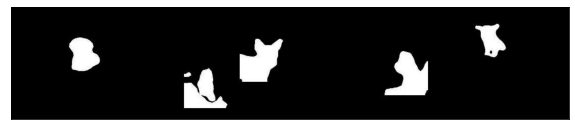

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


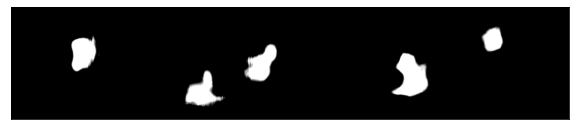



Test - Actual Depth


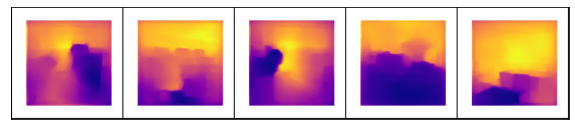

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


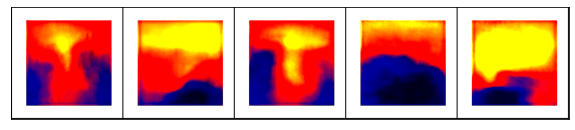

test: bce: 0.326065, dice: 0.390224, loss: 0.326065
test: bce: 0.326777, dice: 0.390041, loss: 0.326777
test: bce: 0.326120, dice: 0.386739, loss: 0.326120
************* 
Epoch: 68 	Training Loss: 0.321818 	Validation Loss: 0.326582

Validation loss decreased (0.328111 --> 0.326582).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
>>>>>>>> 
Epoch 69/71, LR: 0.01
train: bce: 0.329947, dice: 0.357012, loss: 0.329947
train: bce: 0.326078, dice: 0.386545, loss: 0.326078
train: bce: 0.325380, dice: 0.385517, loss: 0.325380
train: bce: 0.325081, dice: 0.385539, loss: 0.325081
train: bce: 0.325789, dice: 0.388388, loss: 0.325789
train: bce: 0.326448, dice: 0.388994, loss: 0.326448
train: bce: 0.326373, dice: 0.389349, loss: 0.326373
train: bce: 0.326154, dice: 0.387293, loss: 0.326154
train: bce: 0.326269, dice: 0.388099, loss: 0.326269
test: bce: 0.323478, dice: 0.421820, loss: 0.323478
test: bce: 0.327668, dice:

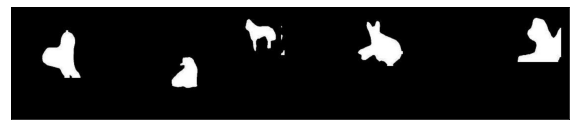

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted mask


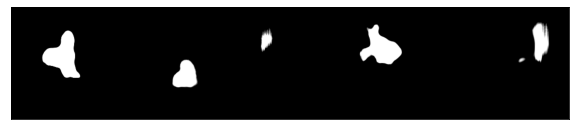



Train - Actual Depth


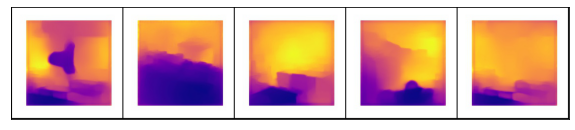

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Train - Predicted Depth


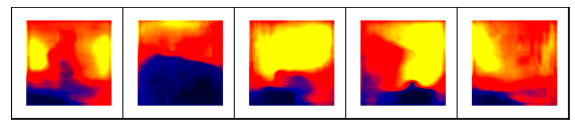

Best val loss: 0.330644
train: bce: 0.323869, dice: 0.372394, loss: 0.323869
train: bce: 0.323991, dice: 0.375580, loss: 0.323991
train: bce: 0.324777, dice: 0.378934, loss: 0.324777
train: bce: 0.324615, dice: 0.379524, loss: 0.324615
train: bce: 0.324382, dice: 0.379414, loss: 0.324382
train: bce: 0.324524, dice: 0.379882, loss: 0.324524
train: bce: 0.324419, dice: 0.379716, loss: 0.324419
train: bce: 0.324655, dice: 0.380454, loss: 0.324655
test: bce: 0.324353, dice: 0.342475, loss: 0.324353


Test - Actual mask: 72


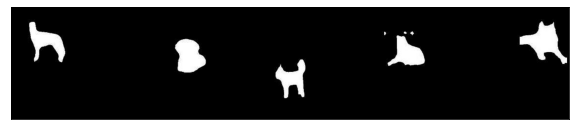

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted mask


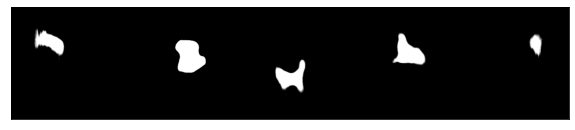



Test - Actual Depth


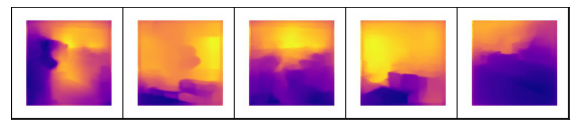

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).




Test - Predicted Depth


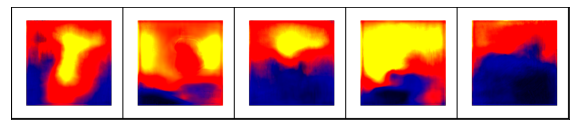

test: bce: 0.323064, dice: 0.369945, loss: 0.323064
test: bce: 0.323927, dice: 0.374159, loss: 0.323927
test: bce: 0.324149, dice: 0.376571, loss: 0.324149
************* 
Epoch: 72 	Training Loss: 0.321779 	Validation Loss: 0.324665

Validation loss decreased (0.324795 --> 0.324665).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
time: 1h 35min 52s


In [48]:
# Load and re-train model

batchzipfilepath = ZIP_FILES_PATH + BATCH_4_ZIP
trainloader, testloader = loaddataset(batchzipfilepath, transformtrain, batch_size=BATCH_SIZE)

model, optimizer, last_epoch, test_loss_min = loadcheckpoint(BEST_MODEL_PATH, model, optimizer)
print('Last Epoch : {}, with loss: {}'.format(last_epoch, test_loss_min))

model, train_loss, test_loss = train_test_model(last_epoch, 10, test_loss_min, model, criterion, device, trainloader, testloader, optimizer, save_path=MODEL_SAVE_PATH)

11
11


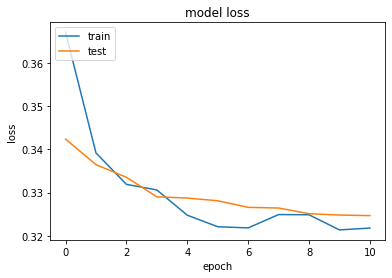

<Figure size 432x288 with 0 Axes>

time: 362 ms


In [49]:
plotmetrics(train_loss, test_loss, METRICS_PATH)

#### Training - 5

In [0]:
# Load and re-train model

batchzipfilepath = ZIP_FILES_PATH + BATCH_5_ZIP
trainloader, testloader = loaddataset(batchzipfilepath, transformtrain, batch_size=BATCH_SIZE)

model, optimizer, last_epoch, test_loss_min = loadcheckpoint(BEST_MODEL_PATH, model, optimizer)
print('Last Epoch : {}, with loss: {}'.format(last_epoch, test_loss_min))

model, train_loss, test_loss = train_test_model(last_epoch, 10, test_loss_min, model, criterion, device, trainloader, testloader, optimizer, save_path=MODEL_SAVE_PATH)

30001
Last Epoch : 81, with loss: 0.3153046412269274
>>>>>>>> 
Epoch 81/90, LR: 0.01


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


train: bce: 0.299685, dice: 0.319424, loss: 0.299685
train: bce: 0.313389, dice: 0.355112, loss: 0.313389
train: bce: 0.314065, dice: 0.358837, loss: 0.314065
train: bce: 0.313455, dice: 0.361578, loss: 0.313455
train: bce: 0.313513, dice: 0.360092, loss: 0.313513
train: bce: 0.313718, dice: 0.360902, loss: 0.313718
train: bce: 0.314125, dice: 0.362568, loss: 0.314125
train: bce: 0.313864, dice: 0.361975, loss: 0.313864
train: bce: 0.313828, dice: 0.361324, loss: 0.313828
test: bce: 0.325392, dice: 0.377263, loss: 0.325392
test: bce: 0.315387, dice: 0.360522, loss: 0.315387
test: bce: 0.313468, dice: 0.355833, loss: 0.313468
test: bce: 0.313342, dice: 0.356921, loss: 0.313342
************* 
Epoch: 81 	Training Loss: 0.299685 	Validation Loss: 0.313581

Validation loss decreased (0.315305 --> 0.313581).  Saving model ...
Checkpoint saved: /content/drive/My Drive/eva-4/assignment-15/assignment-15-final/saved_models/best_model.pth
>>>>>>>> 
Epoch 82/90, LR: 0.01
train: bce: 0.323051, dice

In [0]:
plotmetrics(train_loss, test_loss, METRICS_PATH)

#### Training - 6

In [0]:
# Load and re-train model

batchzipfilepath = ZIP_FILES_PATH + BATCH_6_ZIP
trainloader, testloader = loaddataset(batchzipfilepath, transformtrain, batch_size=BATCH_SIZE)

model, optimizer, last_epoch, test_loss_min = loadcheckpoint(BEST_MODEL_PATH, model, optimizer)
print('Last Epoch : {}, with loss: {}'.format(last_epoch, test_loss_min))

model, train_loss, test_loss = train_test_model(last_epoch, 10, test_loss_min, model, criterion, device, trainloader, testloader, optimizer, save_path=MODEL_SAVE_PATH)

In [0]:
plotmetrics(train_loss, test_loss, METRICS_PATH)

#### Training - 7

In [0]:
# Load and re-train model

batchzipfilepath = ZIP_FILES_PATH + BATCH_7_ZIP
trainloader, testloader = loaddataset(batchzipfilepath, transformtrain, batch_size=BATCH_SIZE)

model, optimizer, last_epoch, test_loss_min = loadcheckpoint(BEST_MODEL_PATH, model, optimizer)
print('Last Epoch : {}, with loss: {}'.format(last_epoch, test_loss_min))

model, train_loss, test_loss = train_test_model(last_epoch, 10, test_loss_min, model, criterion, device, trainloader, testloader, optimizer, save_path=MODEL_SAVE_PATH)

In [0]:
plotmetrics(train_loss, test_loss, METRICS_PATH)

#### Training - 8

In [0]:
# Load and re-train model

batchzipfilepath = ZIP_FILES_PATH + BATCH_8_ZIP
trainloader, testloader = loaddataset(batchzipfilepath, transformtrain, batch_size=BATCH_SIZE)

model, optimizer, last_epoch, test_loss_min = loadcheckpoint(BEST_MODEL_PATH, model, optimizer)
print('Last Epoch : {}, with loss: {}'.format(last_epoch, test_loss_min))

model, train_loss, test_loss = train_test_model(last_epoch, 10, test_loss_min, model, criterion, device, trainloader, testloader, optimizer, save_path=MODEL_SAVE_PATH)

In [0]:
plotmetrics(train_loss, test_loss, METRICS_PATH)

#### Training - 9

In [0]:
# Load and re-train model

batchzipfilepath = ZIP_FILES_PATH + BATCH_9_ZIP
trainloader, testloader = loaddataset(batchzipfilepath, transformtrain, batch_size=BATCH_SIZE)

model, optimizer, last_epoch, test_loss_min = loadcheckpoint(BEST_MODEL_PATH, model, optimizer)
print('Last Epoch : {}, with loss: {}'.format(last_epoch, test_loss_min))

model, train_loss, test_loss = train_test_model(last_epoch, 10, test_loss_min, model, criterion, device, trainloader, testloader, optimizer, save_path=MODEL_SAVE_PATH)

In [0]:
plotmetrics(train_loss, test_loss, METRICS_PATH)

#### Training - 10

In [0]:
# Load and re-train model

batchzipfilepath = ZIP_FILES_PATH + BATCH_10_ZIP
trainloader, testloader = loaddataset(batchzipfilepath, transformtrain, batch_size=BATCH_SIZE)

model, optimizer, last_epoch, test_loss_min = loadcheckpoint(BEST_MODEL_PATH, model, optimizer)
print('Last Epoch : {}, with loss: {}'.format(last_epoch, test_loss_min))

model, train_loss, test_loss = train_test_model(last_epoch, 10, test_loss_min, model, criterion, device, trainloader, testloader, optimizer, save_path=MODEL_SAVE_PATH)

In [0]:
plotmetrics(train_loss, test_loss, METRICS_PATH)

## Analysis

In [0]:
# Load and re-train model

batchzipfilepath = ZIP_FILES_PATH + BATCH_4_ZIP
trainloader, testloader = loaddataset(batchzipfilepath, transformtrain, batch_size=BATCH_SIZE)

model, optimizer, last_epoch, test_loss_min = loadcheckpoint(BEST_MODEL_PATH, model, optimizer)
print('Last Epoch : {}, with loss: {}'.format(last_epoch, test_loss_min))

model, train_loss, test_loss = train_test_model(last_epoch, EPOCHS, test_loss_min, model, criterion, device, trainloader, testloader, optimizer, save_path=MODEL_SAVE_PATH)

In [0]:
plotmetrics(train_loss, test_loss, METRICS_PATH)

#### Summary

| S.No | #images/GT | #Channels               | Model                                                        | #Params | Loss Fn           | Optimizer | #Epochs | Observed loss | Output       | Remarks                                |
| ---- | ---------- | ----------------------- | ------------------------------------------------------------ | ------- | ----------------- | --------- | ------- | ------------- | ------------ | -------------------------------------- |
| 1    | 500        | in - 3, mask-1, depth-3 | [UNet based- korea](https://raw.githubusercontent.com/ugent-korea/pytorch-unet-segmentation/master/src/simple_model.py) | 14,348,004      | BCEWithLogitsLoss | SGD       | 100     | 0.72          | mask + depth | Both predicted. Mask predicted at E-70 |
|      |            |                         |                                                              |         |                   |           |         |               |              |                                        |
|      |            |                         |                                                              |         |                   |           |         |               |              |                                        |
|      |            |                         |                                                              |         |                   |           |         |               |              |                                        |
|      |            |                         |                                                              |         |                   |           |         |               |              |                                        |
|      |            |                         |                                                              |         |                   |           |         |               |              |                                        |
|      |            |                         |                                                              |         |                   |           |         |               |              |                                        |
|      |            |                         |                                                              |         |                   |           |         |               |              |                                        |
|      |            |                         |                                                              |         |                   |           |         |               |              |                                        |


#### Optimizations
- Dataset loading
  - Initially trained model on 500 images of bg_fg, masks and depths each. It gave results for mask at 70 epoch and depth from beginning.
  - Increased to 10k images each and dataset loading part failed
    - Iterating though all images in a directory
    - SOLUTION: created label.txt to contain name of files and generated dataset through these names.
    - Training is very slow.
    